In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from itertools import combinations
from collections import Counter
import networkx as nx
from pyvis.network import Network

In [15]:
# Read parquet file
# df = pd.read_parquet('../allocine_spider(3).parquet')
# df.head()
import pandas as pd
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
import pyarrow

file_name = "allo_cine"
version="2.2.1"

ml_client = MLClient(
    credential=DefaultAzureCredential(),
    subscription_id="72eb7803-e874-44cb-b6d9-33f2fa3eb88c",
    resource_group_name="vpoutotrg",
    workspace_name="mlstudio-groupe4"
)

data_asset = ml_client.data.get(file_name, version=version)
print(data_asset.path)


df = pd.read_parquet(data_asset.path)

df.head()


Overriding of current TracerProvider is not allowed
Overriding of current LoggerProvider is not allowed
Overriding of current MeterProvider is not allowed
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented
Attempting to instrument while already instrumented


azureml://subscriptions/72eb7803-e874-44cb-b6d9-33f2fa3eb88c/resourcegroups/vpoutotrg/workspaces/mlstudio-groupe4/datastores/workspaceblobstore/paths/LocalUpload/19ec33ce8858cdb90c86accbe1c1a507/allocine_spider_clean.parquet


actors  critics_score  \
0  [Arieh Worthalter, Arthur Harari, Stéphan Guér...            4.4   
1  [Monica Bellucci, Vincent Cassel, Albert Dupon...            3.5   
2                                     [Thom Hoffman]            2.8   
3  [Lou de Laâge, Raphaël Personnaz, Isabelle Car...            3.3   
4  [Michael B. Jordan, Jamie Foxx, Brie Larson, R...            3.0   

        date                           directors               editor  \
0 2023-09-27                       [Cédric Kahn]             Ad Vitam   
1 2020-08-26                        [Gaspar Noé]       Carlotta Films   
2 2024-08-07  [Richard Claus, Karsten Kiilerich]             Le Pacte   
3 2022-12-21                   [Olivier Treiner]                  SND   
4 2020-01-29             [Destin Daniel Cretton]  Warner Bros. France   

                                       genre  \
0  [Policier, Drame, Historique, Judiciaire]   
1                          [Drame, Thriller]   
2    [Aventure, Animation, Comédie, Famille]   
3                                    [Drame]   
4                            [Biopic, Drame]   

                                  langage  length  \
0                              [Français]   116.0   
1  [Anglais, Français, Italien, Espagnol]    90.0   
2                           [Néerlandais]    84.0   
3                              [Français]   120.0   
4                               [Anglais]   137.0   

                               nationality  viewers_score  \
0                                 [France]            3.9   
1                                 [France]            NaN   
2  [Danemark, France, Allemagne, Pays-Bas]            3.0   
3                                 [France]            3.8   
4                                 [U.S.A.]            4.1   

   us_first_week_boxoffice  french_first_week_boxoffice french_visa  \
0                      NaN                     110011.0      157303   
1                      NaN                       2905.0      153336   
2                      NaN                      39119.0      160622   
3                      NaN                      64039.0      152607   
4                9713228.0                     113153.0      152118   

                                title              vo_title  \
0                   Le Procès Goldman                  None   
1  Irréversible - Inversion Intégrale                  None   
2              Petit Panda en Afrique  Panda Bear in Africa   
3             Le Tourbillon de la vie                  None   
4               La Voie de la justice            Just Mercy   

                                                 url  
0  /article/fichearticle_gen_carticle=1000093547....  
1   /article/fichearticle_gen_carticle=18692477.html  
2  /article/fichearticle_gen_carticle=1000096064....  
3  /article/fichearticle_gen_carticle=1000006465....  
4  /video/player_gen_cmedia=19586793&cfilm=239735...

In [3]:
df.info

<bound method DataFrame.info of                                                  actors  critics_score  \
0     [Arieh Worthalter, Arthur Harari, Stéphan Guér...            4.4   
1     [Monica Bellucci, Vincent Cassel, Albert Dupon...            3.5   
2                                        [Thom Hoffman]            2.8   
3     [Lou de Laâge, Raphaël Personnaz, Isabelle Car...            3.3   
4     [Michael B. Jordan, Jamie Foxx, Brie Larson, R...            3.0   
...                                                 ...            ...   
9153  [Brad Pitt, Joey King, Aaron Taylor-Johnson, B...            3.2   
9154  [Nicholas Hoult, J.K. Simmons, Kiefer Sutherla...            3.8   
9155  [Jacques Gamblin, Pascale Arbillot, Pablo Paul...            3.5   
9156  [Alberto Ammann, Bruna Cusí, Ben Temple, Laura...            3.6   
9157  [Isabelle Huppert, Reda Kateb, Naidra Ayadi, J...            3.7   

           date                                  directors  \
0    2023-09-27  

In [4]:
df.describe()

critics_score                           date       length  \
count    9141.000000                           9154  9142.000000   
mean        3.093228  2014-08-25 20:01:31.238802688   103.329906   
min         1.000000            1994-11-23 00:00:00    24.000000   
25%         2.700000            2009-12-16 00:00:00    91.000000   
50%         3.100000            2014-12-10 00:00:00   100.000000   
75%         3.500000            2019-07-17 00:00:00   113.000000   
max         4.900000            2025-05-28 00:00:00   543.000000   
std         0.633932                            NaN    20.453241   

       viewers_score  us_first_week_boxoffice  french_first_week_boxoffice  
count    8756.000000             2.367000e+03                 9.151000e+03  
mean        3.014676             2.334707e+07                 3.453559e+05  
min         0.800000             9.300000e+01                 5.000000e+00  
25%         2.500000             6.249958e+06                 6.261000e+03  
50%         3.100000             1.392286e+07                 4.667200e+04  
75%         3.500000             2.800877e+07                 1.779105e+05  
max         4.500000             3.571150e+08                 4.450000e+07  
std         0.682251             2.995228e+07                 1.824089e+06

In [22]:
df.dtypes

actors                          object
critics_score                   object
date                            object
director                        object
editor                          object
french_boxoffice                 int64
french_first_week_boxoffice    float64
french_visa                     object
genre                           object
langage                         object
length                          object
nationality                     object
title                           object
url                             object
viewers_score                   object
vo_title                        object
dtype: object

In [23]:
df.isna().sum()

actors                          151
critics_score                     0
date                              0
director                         15
editor                            0
french_boxoffice                  0
french_first_week_boxoffice       3
french_visa                       0
genre                             0
langage                           0
length                            0
nationality                       6
title                             0
url                               0
viewers_score                     0
vo_title                       4772
dtype: int64

In [5]:
df["actors"].fillna('No actors', inplace=True)

/tmp/ipykernel_169210/3692202257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["actors"].fillna('No actors', inplace=True)


In [6]:
df["vo_title"].fillna(df['title'], inplace=True)

/tmp/ipykernel_169210/593610535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["vo_title"].fillna(df['title'], inplace=True)


In [4]:
df.isna().sum()

actors                            0
critics_score                    13
date                              0
directors                         0
editor                            0
genre                             0
langage                           0
length                           12
nationality                       6
viewers_score                   398
us_first_week_boxoffice        6787
french_first_week_boxoffice       3
french_visa                       0
title                             0
vo_title                          0
url                               0
dtype: int64

In [5]:
df['french_visa'].value_counts(ascending=True)

french_visa
129810        1
150402        1
137875        1
139800        1
141041        1
           ... 
114484        1
113190        1
111 373       1
147589        2
-          1343
Name: count, Length: 7811, dtype: int64

In [6]:
df[df['french_visa']=='-']

actors  critics_score  \
24    [Tom Holland, Zendaya, Benedict Cumberbatch, J...            3.3   
37    [Alexandre Steiger, Christophe Paou, Lilith Gr...            3.5   
60    [Daniel Antivilo, Sebastian Hülk, Daniel Muñoz...            3.0   
65    [Eddie Peng, Liya Tong, Jia Zhangke, Zhang Yi,...            4.2   
68    [Michael Fassbender, Cate Blanchett, Tom Burke...            3.6   
...                                                 ...            ...   
9120  [Mia Goth, Jenna Ortega, Martin Henderson, Bri...            3.9   
9123  [Daniel Craig, Drew Starkey, Jason Schwartzman...            3.1   
9138  [Robert Stadlober, Fritz Karl, Franziska Weisz...            3.1   
9144  [Scarlett Johansson, Channing Tatum, Jim Rash,...            3.4   
9154  [Nicholas Hoult, J.K. Simmons, Kiefer Sutherla...            3.8   

           date                   directors  \
24   2021-12-15                 [Jon Watts]   
37   2021-11-17  [Jean-Christophe Meurisse]   
60   2025-03-05        [Christopher Murray]   
65   2025-03-05                   [Hu Guan]   
68   2025-03-12         [Steven Soderbergh]   
...         ...                         ...   
9120 2022-11-02                   [Ti West]   
9123 2025-02-26           [Luca Guadagnino]   
9138 2025-02-19              [Joachim Lang]   
9144 2024-07-10             [Greg Berlanti]   
9154 2024-10-30            [Clint Eastwood]   

                                       editor  \
24             Sony Pictures Releasing France   
37                           The Jokers Films   
60                               Bobine Films   
65                                    Memento   
68    Universal Pictures International France   
...                                       ...   
9120                                Kinovista   
9123                         Pan Distribution   
9138                      Condor Distribution   
9144           Sony Pictures Releasing France   
9154                      Warner Bros. France   

                                genre               langage  length  \
24    [Action, Aventure, Fantastique]             [Anglais]   148.0   
37                   [Comédie, Drame]            [Français]   105.0   
60                      [Fantastique]  [Allemand, Espagnol]   103.0   
65                            [Drame]             [Chinois]   110.0   
68             [Espionnage, Thriller]             [Anglais]    93.0   
...                               ...                   ...     ...   
9120              [Epouvante-horreur]             [Anglais]   105.0   
9123             [Comédie dramatique]             [Anglais]   136.0   
9138      [Biopic, Drame, Historique]            [Allemand]   124.0   
9144               [Comédie, Romance]             [Anglais]   131.0   
9154                [Drame, Thriller]             [Anglais]   114.0   

                 nationality  viewers_score  us_first_week_boxoffice  \
24                  [U.S.A.]            3.9              253000000.0   
37                  [France]            3.2                      NaN   
60        [Chili, Allemagne]            2.6                      NaN   
65                   [Chine]            4.1                      NaN   
68         [Grande-Bretagne]            3.1                      NaN   
...                      ...            ...                      ...   
9120                [U.S.A.]            3.1                4407750.0   
9123        [U.S.A., Italie]            2.7                 790954.0   
9138  [Allemagne, Slovaquie]            3.6                      NaN   
9144                [U.S.A.]            3.6                9402176.0   
9154                [U.S.A.]            3.9                      NaN   

      french_first_week_boxoffice french_visa                    title  \
24                      2867515.0           -  Spider-Man: No Way Home   
37                        17696.0           -        Oranges sanguines   
60                          195.0           -   Brujeria - Sorcell

In [16]:
#datetime conversion
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df.head()

actors  critics_score  \
0  [Arieh Worthalter, Arthur Harari, Stéphan Guér...            4.4   
1  [Monica Bellucci, Vincent Cassel, Albert Dupon...            3.5   
2                                     [Thom Hoffman]            2.8   
3  [Lou de Laâge, Raphaël Personnaz, Isabelle Car...            3.3   
4  [Michael B. Jordan, Jamie Foxx, Brie Larson, R...            3.0   

        date                           directors               editor  \
0 2023-09-27                       [Cédric Kahn]             Ad Vitam   
1 2020-08-26                        [Gaspar Noé]       Carlotta Films   
2 2024-08-07  [Richard Claus, Karsten Kiilerich]             Le Pacte   
3 2022-12-21                   [Olivier Treiner]                  SND   
4 2020-01-29             [Destin Daniel Cretton]  Warner Bros. France   

                                       genre  \
0  [Policier, Drame, Historique, Judiciaire]   
1                          [Drame, Thriller]   
2    [Aventure, Animation, Comédie, Famille]   
3                                    [Drame]   
4                            [Biopic, Drame]   

                                  langage  length  \
0                              [Français]   116.0   
1  [Anglais, Français, Italien, Espagnol]    90.0   
2                           [Néerlandais]    84.0   
3                              [Français]   120.0   
4                               [Anglais]   137.0   

                               nationality  viewers_score  \
0                                 [France]            3.9   
1                                 [France]            NaN   
2  [Danemark, France, Allemagne, Pays-Bas]            3.0   
3                                 [France]            3.8   
4                                 [U.S.A.]            4.1   

   us_first_week_boxoffice  french_first_week_boxoffice french_visa  \
0                      NaN                     110011.0      157303   
1                      NaN                       2905.0      153336   
2                      NaN                      39119.0      160622   
3                      NaN                      64039.0      152607   
4                9713228.0                     113153.0      152118   

                                title              vo_title  \
0                   Le Procès Goldman                  None   
1  Irréversible - Inversion Intégrale                  None   
2              Petit Panda en Afrique  Panda Bear in Africa   
3             Le Tourbillon de la vie                  None   
4               La Voie de la justice            Just Mercy   

                                                 url  
0  /article/fichearticle_gen_carticle=1000093547....  
1   /article/fichearticle_gen_carticle=18692477.html  
2  /article/fichearticle_gen_carticle=1000096064....  
3  /article/fichearticle_gen_carticle=1000006465....  
4  /video/player_gen_cmedia=19586793&cfilm=239735...

In [8]:
df['critics_score'].replace('-', None, inplace=True)

/tmp/ipykernel_156701/3555353664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critics_score'].replace('-', None, inplace=True)


In [9]:
df['viewers_score'].replace('-', None, inplace=True)
df['viewers_score'].replace('--', None, inplace=True)

/tmp/ipykernel_156701/684265317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['viewers_score'].replace('-', None, inplace=True)
/tmp/ipykernel_156701/684265317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [10]:
df['length'].value_counts()

length
90.0     438
100.0    377
95.0     374
105.0    300
98.0     243
        ... 
198.0      1
189.0      1
206.0      1
192.0      1
214.0      1
Name: count, Length: 172, dtype: int64

In [17]:
df['length'].replace('Date de sortie inconnue', None, inplace=True)

/tmp/ipykernel_169210/1184290587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['length'].replace('Date de sortie inconnue', None, inplace=True)


In [18]:
df['critics_score']=pd.to_numeric(df['critics_score'], errors='coerce')
df['length']=pd.to_numeric(df['length'], errors='coerce')
df['viewers_score']=pd.to_numeric(df['viewers_score'], errors='coerce')

In [13]:
df.dtypes

actors                                 object
critics_score                         float64
date                           datetime64[ns]
directors                              object
editor                                 object
genre                                  object
langage                                object
length                                float64
nationality                            object
viewers_score                         float64
us_first_week_boxoffice               float64
french_first_week_boxoffice           float64
french_visa                            object
title                                  object
vo_title                               object
url                                    object
dtype: object

In [14]:
df.describe()

critics_score                           date       length  \
count    9141.000000                           9154  9142.000000   
mean        3.093228  2014-08-25 20:01:31.238802688   103.329906   
min         1.000000            1994-11-23 00:00:00    24.000000   
25%         2.700000            2009-12-16 00:00:00    91.000000   
50%         3.100000            2014-12-10 00:00:00   100.000000   
75%         3.500000            2019-07-17 00:00:00   113.000000   
max         4.900000            2025-05-28 00:00:00   543.000000   
std         0.633932                            NaN    20.453241   

       viewers_score  us_first_week_boxoffice  french_first_week_boxoffice  
count    8756.000000             2.367000e+03                 9.151000e+03  
mean        3.014676             2.334707e+07                 3.453559e+05  
min         0.800000             9.300000e+01                 5.000000e+00  
25%         2.500000             6.249958e+06                 6.261000e+03  
50%         3.100000             1.392286e+07                 4.667200e+04  
75%         3.500000             2.800877e+07                 1.779105e+05  
max         4.500000             3.571150e+08                 4.450000e+07  
std         0.682251             2.995228e+07                 1.824089e+06

In [5]:
# Plot the box office for the the date
plt.figure(figsize=(12, 4))
sns.lineplot(x="date", y="french_first_week_boxoffice", data=df)

<Axes: xlabel='date', ylabel='french_first_week_boxoffice'>

In [6]:
# Addition of a year columns
df['year']=df['date'].dt.year

Text(0, 0.5, 'French box office (average)')

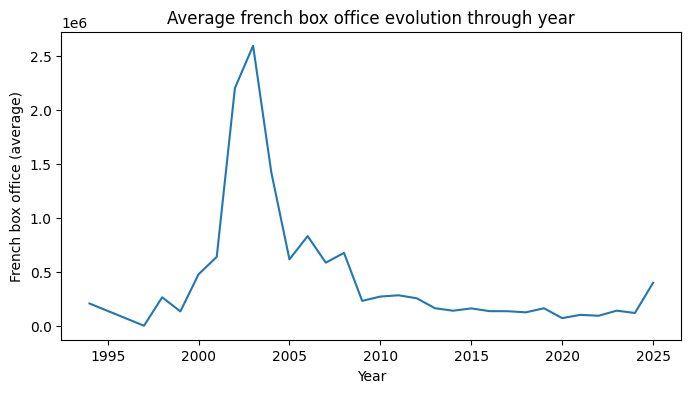

In [8]:
# Mean of boxoffice by year
mean_boxoffice_year = df['french_first_week_boxoffice'].groupby(df['year']).mean()
mean_boxoffice_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_boxoffice_year.index, y=mean_boxoffice_year.values)
plt.title('Average french box office evolution through year')
plt.xlabel('Year')
plt.ylabel('French box office (average)')


Text(0, 0.5, 'French box office first week (average)')

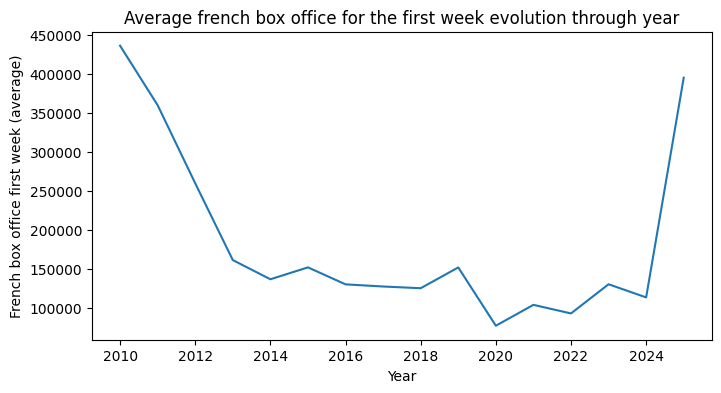

In [40]:
# Mean of boxoffice by year
mean_boxoffice_week_year = df['french_first_week_boxoffice'].groupby(df['year']).mean()
mean_boxoffice_week_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_boxoffice_week_year.index, y=mean_boxoffice_week_year.values)
plt.title('Average french box office for the first week evolution through year')
plt.xlabel('Year')
plt.ylabel('French box office first week (average)')

In [9]:
# Mean of length by year
mean_length_year = df['length'].groupby(df['year']).mean()
mean_length_year
# Plot of the mean by year
plt.figure(figsize=(8, 4))
sns.lineplot(x=mean_length_year.index, y=mean_length_year.values)
plt.title('Average of the length of movies by year')
plt.xlabel('Length (min)')
plt.ylabel('French box office (average)')

Text(0, 0.5, 'French box office (average)')

Text(0, 0.5, 'Number of movies')

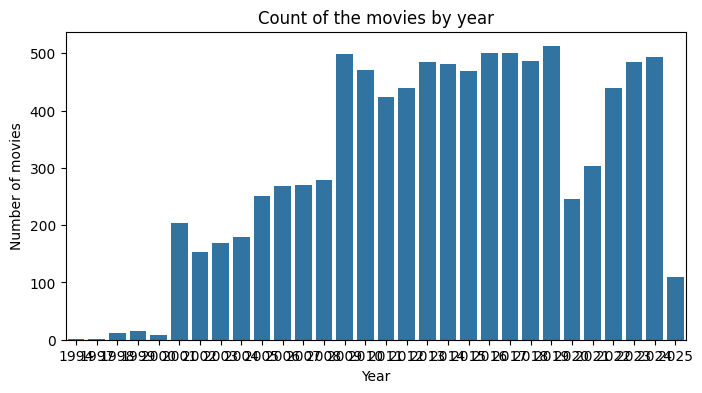

In [24]:
nb_movies_year = df['french_visa'].groupby(df['year']).count()

# Plot of the movie count by year
plt.figure(figsize=(8, 4))
sns.barplot(x=nb_movies_year.index, y=nb_movies_year.values)
plt.title('Count of the movies by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Study of the distribution of continuous values

In [43]:
df.columns

Index(['actors', 'critics_score', 'date', 'director', 'editor',
       'french_boxoffice', 'french_first_week_boxoffice', 'french_visa',
       'genre', 'langage', 'length', 'nationality', 'title', 'url',
       'viewers_score', 'vo_title', 'year'],
      dtype='object')

In [25]:
continuous_columns = ['critics_score', 'french_boxoffice', 'french_first_week_boxoffice', 'length', 'viewers_score']

def find_outliers_iqr(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

#List to collect outliers
all_outliers = []

for i in continuous_columns:
    lower_bound, upper_bound = find_outliers_iqr(df[i])
    outliers = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]
    all_outliers.append(outliers)
    print(f"Outlier for the column {i} :")
    print(outliers)

#Combine all the outliers
all_outliers_combined = pd.concat(all_outliers)

#Count outliers
outliers_counts = all_outliers_combined.value_counts()
print("\nFrequency of outliers :")
print(outliers_counts)



Outlier for the column critics_score :
Series([], Name: critics_score, dtype: float64)


KeyError: 'french_boxoffice'

In [26]:
# Study of the zscore

zscore =stats.zscore(df[continuous_columns], nan_policy='omit') # ignore the NaN Values
zscore
df_zscore=pd.DataFrame(zscore, columns=continuous_columns)

df_zscore

#Find outliers:
outliers = {}
for col in df_zscore.columns:
    outliers[col] = df_zscore[df_zscore[col] > 3]

#count oultier for each column:
outliers_count = {col: len(outliers[col]) for col in outliers}

#Result:
for col, count in outliers_count.items():
    print(f"Number of outliers for {col}: {count}")

#Visualization:
for col in continuous_columns:
    sns.histplot(x=df_zscore[col])
    plt.axvline(3, color='red', linestyle='--', label='Z=3')
    plt.axvline(-3, color='red', linestyle='--', label='Z=-3')
    plt.legend()
    plt.title(f'Distribution of z_{col}')
    plt.show()



KeyError: "['french_boxoffice'] not in index"

The distribution of the values of the continuous columns does not follow a normal law. We should perform a logarythmic transformation before to train and test our model.

# Study of categorical values

In [46]:
df.columns

Index(['actors', 'critics_score', 'date', 'director', 'editor',
       'french_boxoffice', 'french_first_week_boxoffice', 'french_visa',
       'genre', 'langage', 'length', 'nationality', 'title', 'url',
       'viewers_score', 'vo_title', 'year'],
      dtype='object')

In [ ]:
# Frequency table
columns_cat = ['actors', 'directors', 'editor', 'french_visa', 'genre', 'langage', 'nationality']

for i in columns_cat:
    count=df[i].value_counts()
    print("Frequency:")
    print(count)

In [9]:
# Aplatir toutes les listes en une seule série
tous_les_acteurs = pd.Series([acteur for sous_liste in df['actors'] for acteur in sous_liste])

# Compter les occurrences
compte_acteurs = tous_les_acteurs.value_counts()

print(compte_acteurs)

o                    172
N                     86
                      86
a                     86
t                     86
                    ... 
Patrick Sébastien      1
Geoffroy Thiebaut      1
Modesto Lacen          1
Quinn McPherson        1
Oliver Trevena         1
Name: count, Length: 37210, dtype: int64


In [20]:
# # Count of actors
# tous_les_acteurs = pd.Series([acteur for sous_liste in df['acteurs'] for acteur in sous_liste])

# # Compter les occurrences
# compte_acteurs = tous_les_acteurs.value_counts()

# Filtrer pour ne garder que les chaînes valides
valid_actors = df['actors'].dropna()
valid_actors = valid_actors[valid_actors.apply(lambda x: isinstance(x, str))]

# Split et aplatir proprement
all_actors = sum(valid_actors.str.split(', '), [])
all_actors = [actor.strip() for actor in all_actors if isinstance(actor, str)]


actors_count = pd.Series(Counter(all_actors)).sort_values(ascending=False)

print(actors_count.head(10))

Series([], dtype: object)


In [21]:
valid_actors

Series([], Name: actors, dtype: object)

In [25]:
from collections import Counter
import pandas as pd

# Filtrer les entrées valides (np.ndarray)
valid_actors = df['actors'].dropna()
valid_actors = valid_actors[valid_actors.apply(lambda x: isinstance(x, np.ndarray))]

# Aplatir et nettoyer
all_actors = [actor.strip() for array in valid_actors for actor in array if isinstance(actor, str)]

# Compter les occurrences
actors_count = pd.Series(Counter(all_actors)).sort_values(ascending=False)

# Afficher le top 10
print(actors_count.head(10))

Gérard Depardieu     70
Olivier Gourmet      68
François Berléand    62
Denis Podalydès      62
Kad Merad            57
Michel Vuillermoz    56
Benoît Poelvoorde    56
André Dussollier     54
Eric Naggar          54
Lionel Abelanski     53
dtype: int64


/tmp/ipykernel_169210/3361513177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")


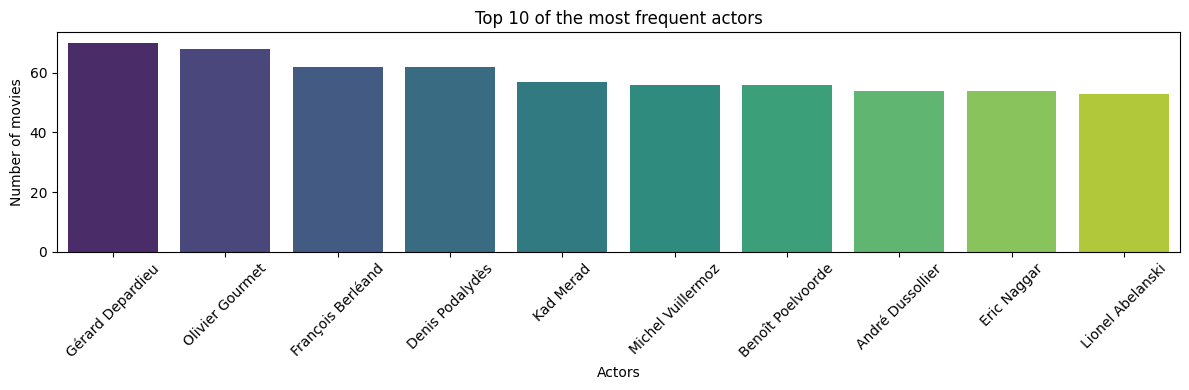

In [27]:
Top_10_actors = actors_count.head(10)
plt.figure(figsize=(12, 4))
sns.barplot(x=Top_10_actors.index, y=Top_10_actors.values, palette="viridis")
plt.title('Top 10 of the most frequent actors')
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
all_genres = pd.Series([genre for sous_liste in df['genre'] for genre in sous_liste])
genres_count = pd.Series(Counter(all_genres)).sort_values(ascending=False)

print(genres_count.head(10))

Drame                 4433
Comédie               2400
Thriller              1301
Action                 924
Romance                923
Comédie dramatique     785
Aventure               744
Animation              715
Fantastique            576
Policier               479
dtype: int64


/tmp/ipykernel_169210/559653893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette="viridis")


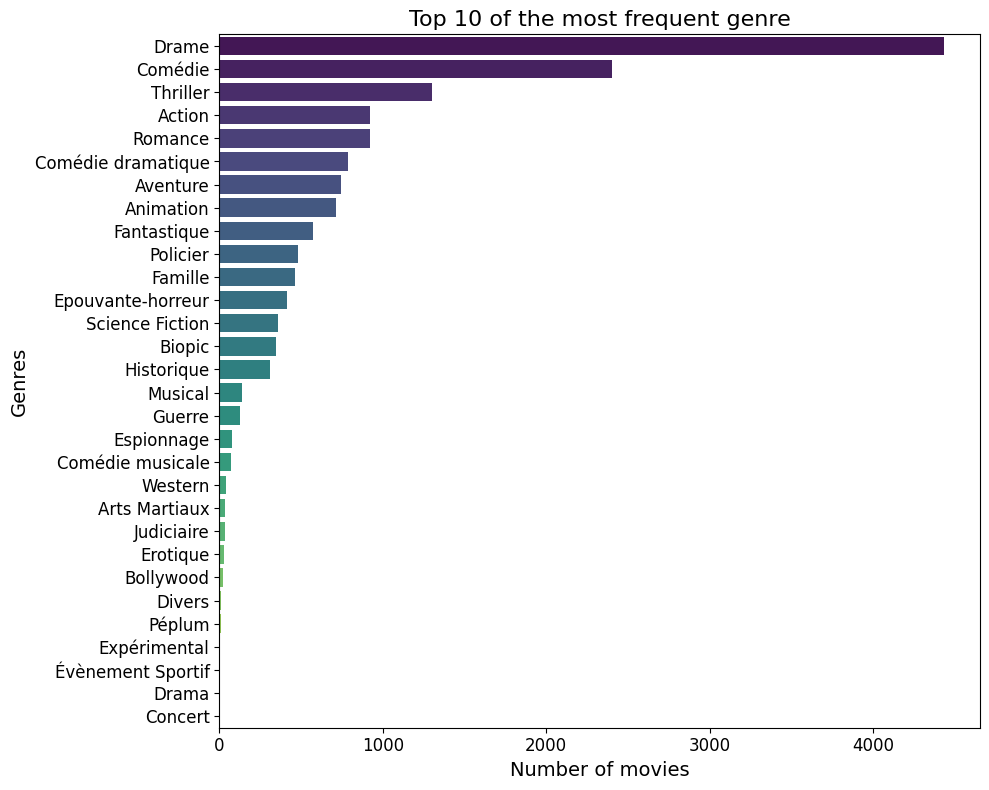

In [29]:


plt.figure(figsize=(10, 8))
sns.barplot(x=genres_count.values, y=genres_count.index, palette="viridis")
plt.title('Top 10 of the most frequent genre', fontsize=16)
plt.xlabel('Number of movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Genres', fontsize=14)
plt.tight_layout()
plt.show()


# Bivariate analysis: Chi² and pearson correlation test

Chi² Test if there is a significant association between two categorical values

In [ ]:
# Chi²
columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']

for target in targets:
    for col in columns_cat:
        if target == col:
            continue
        else:

            table = pd.crosstab(df[target], df[col])

            if table.shape[1] < 2 or table.shape[0] < 2:
                print(f"❌ Not possible to perform the test\n")
                continue

            chi2, p, dof, expected = chi2_contingency(table)
            
            print(f"📊 Variable : {col}")
            print(f"Chi² : {chi2:.2f}, p-value : {p:.4f}, ddl : {dof}")
        
            if p < 0.05:
                print(f"✅ {target} and {col} are dependant!\n")
            else:
                print(f"🟰 {target} and {col} are independant\n")



📊 Variable : director
Chi² : 32660387.41, p-value : 1.0000, ddl : 32729250
🟰 actors and director are independant

📊 Variable : editor
Chi² : 3347620.71, p-value : 0.0000, ddl : 3309508
✅ actors and editor are dependant!

📊 Variable : french_visa
Chi² : 48937934.89, p-value : 0.0000, ddl : 48761048
✅ actors and french_visa are dependant!

📊 Variable : genre
Chi² : 3358645.99, p-value : 0.0000, ddl : 3331186
✅ actors and genre are dependant!

📊 Variable : langage
Chi² : 3643814.50, p-value : 0.0000, ddl : 3598548
✅ actors and langage are dependant!

📊 Variable : nationality
Chi² : 9251479.11, p-value : 1.0000, ddl : 9329532
🟰 actors and nationality are independant

📊 Variable : actors
Chi² : 32660387.41, p-value : 1.0000, ddl : 32729250
🟰 director and actors are independant

📊 Variable : editor
Chi² : 2671124.61, p-value : 0.0000, ddl : 2074740
✅ director and editor are dependant!

📊 Variable : french_visa
Chi² : 30039726.09, p-value : 1.0000, ddl : 30527670
🟰 director and french_visa ar

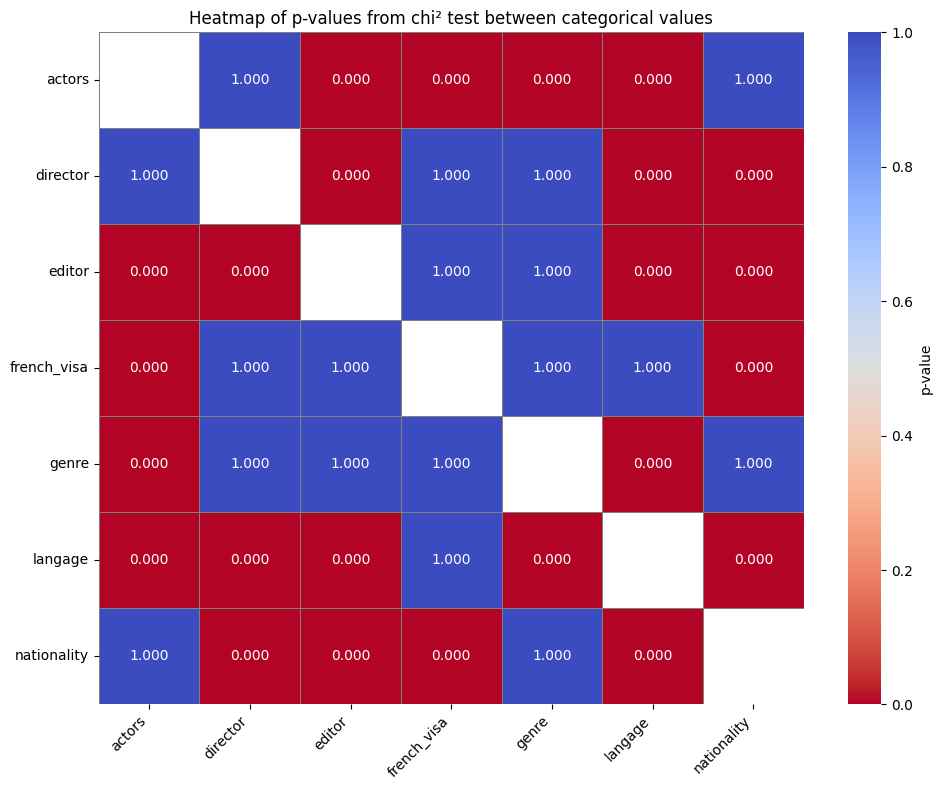

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
results = pd.DataFrame(index=columns_cat, columns=columns_cat, dtype=float)

for target in columns_cat:
    for col in columns_cat:
        if target == col:
            results.loc[target, col] = np.nan  # Pas de test sur la même variable
        else:
            table = pd.crosstab(df[target], df[col])
            if table.shape[1] < 2 or table.shape[0] < 2:
                results.loc[target, col] = np.nan  # Trop peu de données pour le test
                continue
            chi2, p, dof, expected = chi2_contingency(table)
            results.loc[target, col] = p

#  Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, fmt=".3f", cmap="coolwarm_r", cbar_kws={'label': 'p-value'}, linewidths=0.5, linecolor='gray')
plt.title("Heatmap of p-values from chi² test between categorical values")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = columns_cat.copy()

# Stock the result
results = []

for target in targets:
    for col in columns_cat:
        if target == col:
            continue

        table = pd.crosstab(df[target], df[col])

        if table.shape[1] < 2 or table.shape[0] < 2:
            results.append({
                'Target': target,
                'Variable': col,
                'Chi²': None,
                'p-value': None,
                'ddl': None,
                'Groups < 5': None,
                'Dependency': 'No'
            })
            continue

        chi2, p, dof, expected = chi2_contingency(table)
        effectif_warning = (expected < 5).sum()

        if p is not None:
            dependence = '✅ Dependence' if p < 0.05 else '🟰 Independence'
        else:
            dependence = '❌ Untest'

        results.append({
            'Target': target,
            'Variable': col,
            'Chi²': round(chi2, 2),
            'p-value': round(p, 4),
            'ddl': dof,
            'Groups < 5': effectif_warning,
            'Dependence': dependence
        })

df_chi2 = pd.DataFrame(results)


In [ ]:
df_chi2

Target     Variable         Chi²  p-value       ddl  Groups < 5  \
0        actors     director  32660387.41      1.0  32729250    32741006   
1        actors       editor   3347620.71      0.0   3309508     3317191   
2        actors  french_visa  48937934.89      0.0  48761048    48775022   
3        actors        genre   3358645.99      0.0   3331186     3338869   
4        actors      langage   3643814.50      0.0   3598548     3606270   
5        actors  nationality   9251479.11      1.0   9329532     9338044   
6      director       actors  32660387.41      1.0  32729250    32741006   
7      director       editor   2671124.61      0.0   2074740     2079729   
8      director  french_visa  30039726.09      1.0  30527670    30538940   
9      director        genre   2067744.96      1.0   2088330     2093321   
10     director      langage   2532230.65      0.0   2255940     2260967   
11     director  nationality   6644293.19      0.0   5837250     5843065   
12       editor       actors   3347620.71      0.0   3309508     3317191   
13       editor     director   2671124.61      0.0   2074740     2079729   
14       editor  french_visa   2974704.74      1.0   3090584     3097754   
15       editor        genre    168042.43      1.0    211138      211863   
16       editor      langage    313503.45      0.0    228084      228851   
17       editor  nationality    689967.67      0.0    591736      593323   
18  french_visa       actors  48937934.89      0.0  48761048    48775022   
19  french_visa     director  30039726.09      1.0  30527670    30538940   
20  french_visa       editor   2974704.74      1.0   3090584     3097754   
21  french_visa        genre   3002447.95      1.0   3110828     3118021   
22  french_visa      langage   3303055.27      1.0   3360504     3367738   
23  french_visa  nationality   8791323.78      0.0   8713248     8721273   
24        genre       actors   3358645.99      0.0   3331186     3338869   
25        genre     director   2067744.96      1.0   2088330     2093321   
26        genre       editor    168042.43      1.0    211138      211863   
27        genre  french_visa   3002447.95      1.0   3110828     3118021   
28        genre      langage    232510.58      0.0    229578      230374   
29        genre  nationality    574096.37      1.0    595612      597225   
30      langage       actors   3643814.50      0.0   3598548     3606270   
31      langage     director   2532230.65      0.0   2255940     2260967   
32      langage       editor    313503.45      0.0    228084      228851   
33      langage  french_visa   3303055.27      1.0   3360504     3367738   
34      langage        genre    232510.58      0.0    229578      230374   
35      langage  nationality   1790232.78      0.0    643416      645075   
36  nationality       actors   9251479.11      1.0   9329532     9338044   
37  nationality     director   6644293.19      0.0   5837250     5843065   
38  nationality       editor    689967.67      0.0    591736      593323   
39  nationality  french_visa   8791323.78      0.0   8713248     8721273   
40  nationality        genre    574096.37      1.0    595612      597225   
41  nationality      langage   1790232.78      0.0    643416      645075   

        Dependence  
0   🟰 Independence  
1     ✅ Dependence  
2     ✅ Dependence  
3     ✅ Dependence  
4     ✅ Dependence  
5   🟰 Independence  
6   🟰 Independence  
7     ✅ Dependence  
8   🟰 Independence  
9   🟰 Independence  
10    ✅ Dependence  
11    ✅ Dependence  
12    ✅ Dependence  
13    ✅ Dependence  
14  🟰 Independence  
15  🟰 Independence  
16    ✅ Dependence  
17    ✅ Dependence  
18    ✅ Dependence  
19  🟰 Independence  
20  🟰 Independence  
21  🟰 Independence  
22  🟰 Independence  
23    ✅ Dependence  
24    ✅ Dependence  
25  🟰 Independence  
26  🟰 Independence  
27  🟰 Independence  
28    ✅ Dependence  
29  🟰 Independence  
30    ✅ Dependence  
31    ✅ Dependence  
32    ✅ Dependence  
33  🟰 Independence  
34   

In [ ]:
# Cramér's V

from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

columns_cat = ['actors', 'director', 'editor', 'french_visa', 'genre', 'langage', 'nationality']
targets = columns_cat.copy()

results = []

def cramers_v(confusion_matrix, chi2_stat):
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0:
        return np.nan
    return np.sqrt(chi2_stat / (n * min_dim))

for target in targets:
    for col in columns_cat:
        if target == col:
            continue

        table = pd.crosstab(df[target], df[col])

        if table.shape[1] < 2 or table.shape[0] < 2:
            results.append({
                'Target': target,
                'Variable': col,
                'Chi²': None,
                'p-value': None,
                'ddl': None,
                'Groups < 5': None,
                'Dependence': '❌ Unsuccessfull test',
                "Cramér's V": None
            })
            continue

        chi2, p, dof, expected = chi2_contingency(table)
        effectif_warning = (expected < 5).sum()
        cramer_v_value = cramers_v(table, chi2)

        if p is not None:
            dependence = '✅ Dependent' if p < 0.05 else '🟰 Independant'
        else:
            dependence = '❌ Test non effectué'

        results.append({
            'Target': target,
            'Variable': col,
            'Chi²': round(chi2, 2),
            'p-value': round(p, 4),
            'ddl': dof,
            'Groups < 5': effectif_warning,
            'Dependence': dependence,
            "Cramér's V": round(cramer_v_value, 3) if not np.isnan(cramer_v_value) else None
        })

# Création du DataFrame
df_chi2_cramer = pd.DataFrame(results)


In [ ]:
df_chi2_cramer

Target     Variable         Chi²  p-value       ddl  Groups < 5  \
0        actors     director  32660387.41      1.0  32729250    32741006   
1        actors       editor   3347620.71      0.0   3309508     3317191   
2        actors  french_visa  48937934.89      0.0  48761048    48775022   
3        actors        genre   3358645.99      0.0   3331186     3338869   
4        actors      langage   3643814.50      0.0   3598548     3606270   
5        actors  nationality   9251479.11      1.0   9329532     9338044   
6      director       actors  32660387.41      1.0  32729250    32741006   
7      director       editor   2671124.61      0.0   2074740     2079729   
8      director  french_visa  30039726.09      1.0  30527670    30538940   
9      director        genre   2067744.96      1.0   2088330     2093321   
10     director      langage   2532230.65      0.0   2255940     2260967   
11     director  nationality   6644293.19      0.0   5837250     5843065   
12       editor       actors   3347620.71      0.0   3309508     3317191   
13       editor     director   2671124.61      0.0   2074740     2079729   
14       editor  french_visa   2974704.74      1.0   3090584     3097754   
15       editor        genre    168042.43      1.0    211138      211863   
16       editor      langage    313503.45      0.0    228084      228851   
17       editor  nationality    689967.67      0.0    591736      593323   
18  french_visa       actors  48937934.89      0.0  48761048    48775022   
19  french_visa     director  30039726.09      1.0  30527670    30538940   
20  french_visa       editor   2974704.74      1.0   3090584     3097754   
21  french_visa        genre   3002447.95      1.0   3110828     3118021   
22  french_visa      langage   3303055.27      1.0   3360504     3367738   
23  french_visa  nationality   8791323.78      0.0   8713248     8721273   
24        genre       actors   3358645.99      0.0   3331186     3338869   
25        genre     director   2067744.96      1.0   2088330     2093321   
26        genre       editor    168042.43      1.0    211138      211863   
27        genre  french_visa   3002447.95      1.0   3110828     3118021   
28        genre      langage    232510.58      0.0    229578      230374   
29        genre  nationality    574096.37      1.0    595612      597225   
30      langage       actors   3643814.50      0.0   3598548     3606270   
31      langage     director   2532230.65      0.0   2255940     2260967   
32      langage       editor    313503.45      0.0    228084      228851   
33      langage  french_visa   3303055.27      1.0   3360504     3367738   
34      langage        genre    232510.58      0.0    229578      230374   
35      langage  nationality   1790232.78      0.0    643416      645075   
36  nationality       actors   9251479.11      1.0   9329532     9338044   
37  nationality     director   6644293.19      0.0   5837250     5843065   
38  nationality       editor    689967.67      0.0    591736      593323   
39  nationality  french_visa   8791323.78      0.0   8713248     8721273   
40  nationality        genre    574096.37      1.0    595612      597225   
41  nationality      langage   1790232.78      0.0    643416      645075   

       Dependence  Cramér's V  
0   🟰 Independant       0.986  
1     ✅ Dependent       0.992  
2     ✅ Dependent       0.988  
3     ✅ Dependent       0.990  
4     ✅ Dependent       0.993  
5   🟰 Independant       0.982  
6   🟰 Independant       0.986  
7     ✅ Dependent       0.887  
8   🟰 Independant       0.946  
9   🟰 Independant       0.778  
10    ✅ Dependent       0.828  
11    ✅ Dependent       0.834  
12    ✅ Dependent       0.992  
13    ✅ Dependent       0.887  
14  🟰 Independant       0.935  
15  🟰 Independant       0.222  
16    ✅ Dependent       0.304  
17    ✅ Dependent       0.451  
18    ✅ Dependent       0.988  
19  🟰 Independant       0.946  
20  🟰 Independant       0.935  
21  🟰 Independant       0.936  
22  

In [ ]:
# Filter the significant dependence
df_significant = df_chi2_cramer[df_chi2_cramer["Dependence"] == '✅ Dependent']

# Pivot for heatmap
heatmap_cramer = df_significant.pivot(index='Target', columns='Variable', values="Cramér's V")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_cramer, annot=True, cmap="YlGnBu", vmin=0, vmax=1, fmt=".2f", cbar_kws={'label': "Cramér's V"})
plt.title("Heatmap of Cramér's V for dependent couples of values")
plt.tight_layout()
plt.show()


Pearson test

In [ ]:
n=len(continuous_columns)

#Empty matrix
a=np.empty((n,n))
a[:] = np.nan

#fulfill matrix with correlations matrix
for i in range(n):
    for j in range(n):
        x = df[continuous_columns[i]]
        y = df[continuous_columns[j]]

        # Delete Nan lines
        mask = x.notna() & y.notna()
        if mask.sum()>1:
        
            coeff, p_value = pearsonr(x[mask], y[mask])
            print(f"Correlation between {continuous_columns[i]} and {continuous_columns[j]}: coeff={coeff}, p={p_value}")
            a[i,j] = p_value
        else:
            print('not enough data to perform the test')
df_pvalue = round(pd.DataFrame(a, columns=continuous_columns, index = continuous_columns),5)

cm = sns.light_palette("blue", as_cmap=True) 

df_pvalue.style.background_gradient(cmap=cm).format(precision=2)

Correlation between critics_score and critics_score: coeff=1.0, p=0.0
Correlation between critics_score and french_boxoffice: coeff=0.048100242979444784, p=3.4604384878136065e-05
Correlation between critics_score and french_first_week_boxoffice: coeff=-0.04574280352259372, p=8.25504472921881e-05
Correlation between critics_score and length: coeff=0.1428583129973765, p=4.69525645753339e-35
Correlation between critics_score and viewers_score: coeff=0.5422886759180189, p=0.0
Correlation between french_boxoffice and critics_score: coeff=0.04810024297944479, p=3.4604384878136065e-05
Correlation between french_boxoffice and french_boxoffice: coeff=0.9999999999999996, p=0.0
Correlation between french_boxoffice and french_first_week_boxoffice: coeff=0.294199397266105, p=3.9158897241591294e-148
Correlation between french_boxoffice and length: coeff=0.1980044919314008, p=1.5892884581482234e-66
Correlation between french_boxoffice and viewers_score: coeff=0.1632154335963845, p=1.1922653195166082e

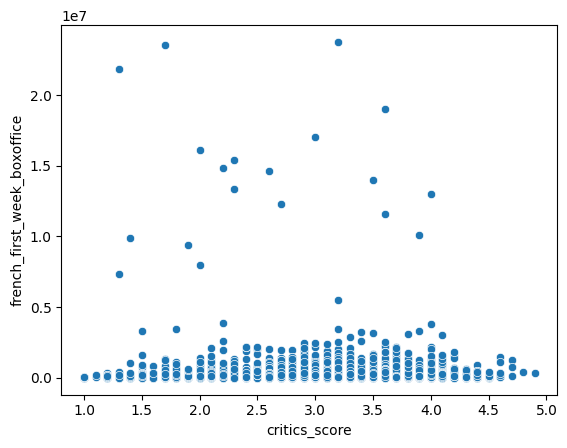

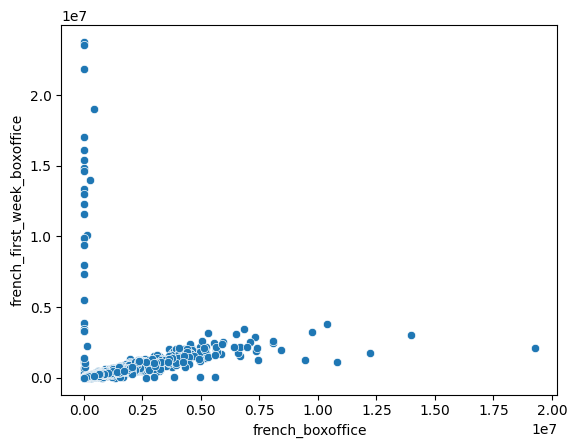

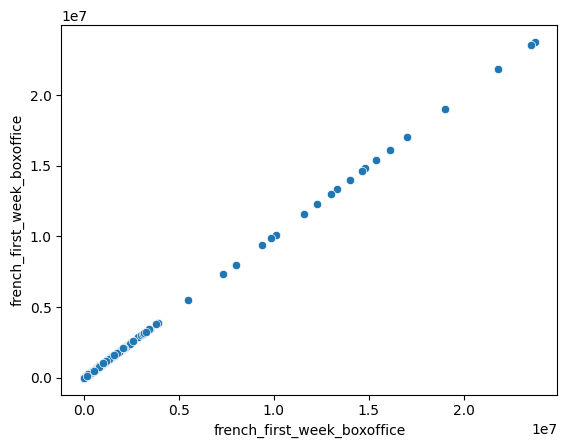

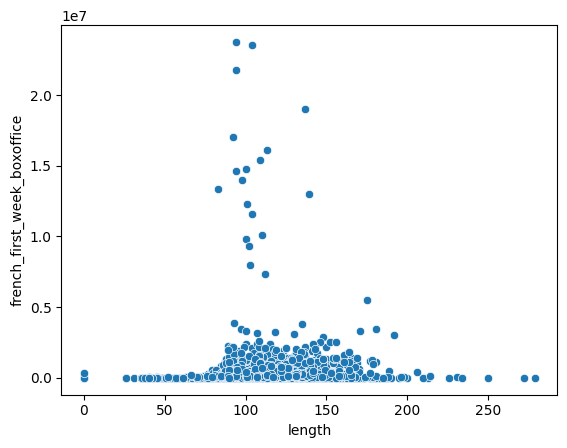

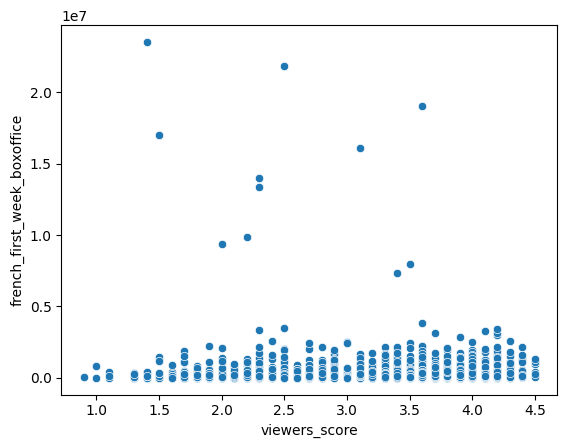

In [ ]:
for i in continuous_columns:
    sns.scatterplot(x=df[i], y=df['french_first_week_boxoffice'])
    plt.show()

Anova test to test continuous data vs categorical data

In [ ]:
# Stock the result
anova_results = pd.DataFrame(index=continuous_columns, columns=columns_cat)


for cont in continuous_columns:
    for cat in columns_cat:
        
        df_sub = df[[cont, cat]].dropna()
        groups = [group[cont] for _, group in df_sub.groupby(cat)]
        
        # Check for the group
        valid_groups = [g for g in groups if len(g) > 1]
        if len(valid_groups) >= 2:
            stat, p_value = f_oneway(*valid_groups)
            anova_results.loc[cont, cat] = round(p_value, 5)
        else:
            anova_results.loc[cont, cat] = np.nan
# Table
cm = sns.light_palette("blue", as_cmap=True)
anova_results = anova_results.astype(float)  
anova_results.style.background_gradient(cmap=cm).format(precision=3)

In [ ]:
# Seuil de significativité
alpha = 0.05

# Stack pour obtenir les p-values sous forme de DataFrame long
significant_pairs = anova_results.stack().reset_index()
significant_pairs.columns = ['Variable Continue', 'Variable Catégorielle', 'p-value']

# On filtre les résultats significatifs
significant_pairs = significant_pairs[significant_pairs['p-value'] < alpha].sort_values('p-value')

significant_pairs.head()  # un aperçu


Variable Continue Variable Catégorielle  p-value
0     critics_score                actors      0.0
1     critics_score              director      0.0
2     critics_score                editor      0.0
4     critics_score                 genre      0.0
5     critics_score               langage      0.0

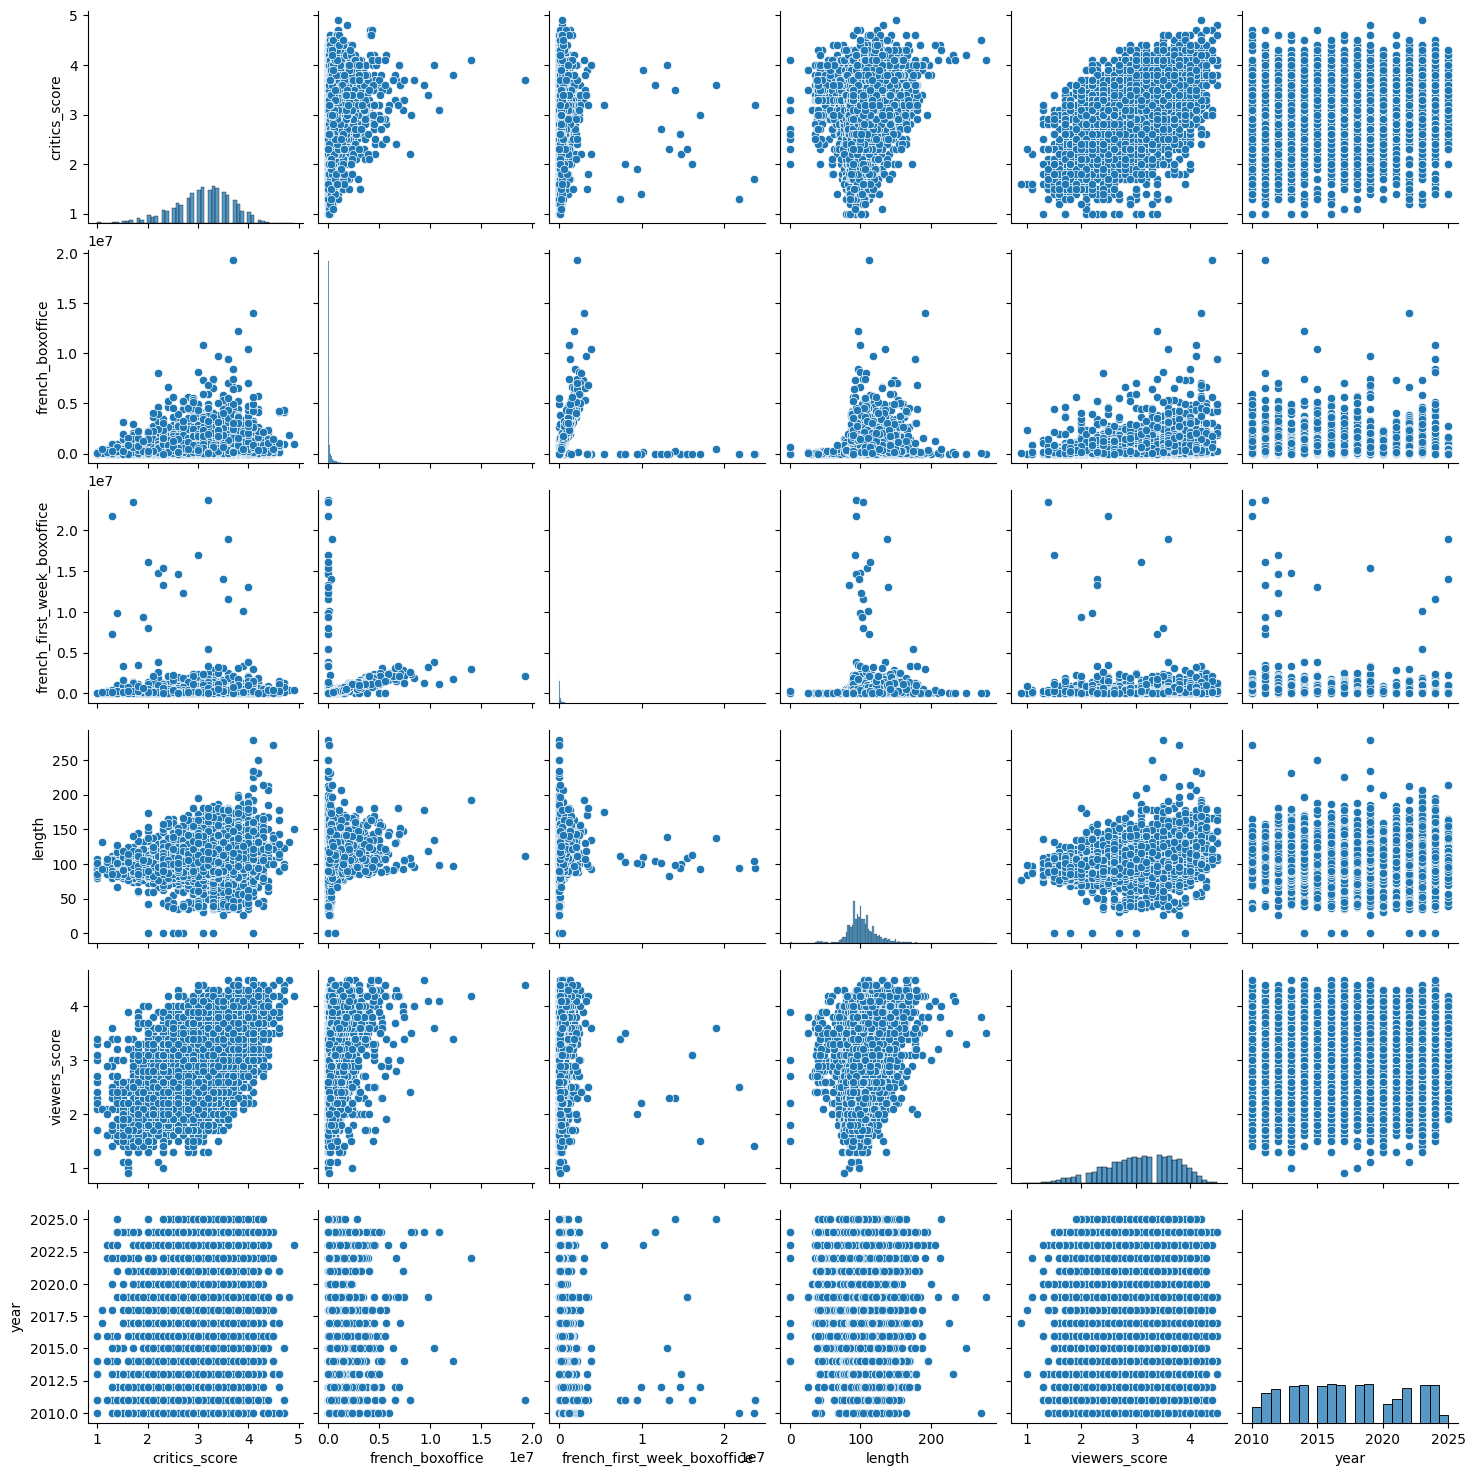

In [ ]:
sns.pairplot(df)

### Study of the genre of the film

In [ ]:
# Test split by keeping only the first genre
df['main_genre'] = df['genre'].dropna().str.split('|').str[0]
sns.pairplot(df, hue='main_genre')


In [ ]:
top_genres = df['main_genre'].value_counts().head(5).index
df_top = df[df['main_genre'].isin(top_genres)]

sns.pairplot(df_top, hue='main_genre', vars=continuous_columns)


In [ ]:
# Explode the genre
df_genres = df.dropna(subset=['genre']).copy()
df_genres['genre_split'] = df_genres['genre'].str.split('|')
df_genres = df_genres.explode('genre_split').reset_index(drop=True)

sns.pairplot(df_genres, hue='genre_split', vars=continuous_columns)


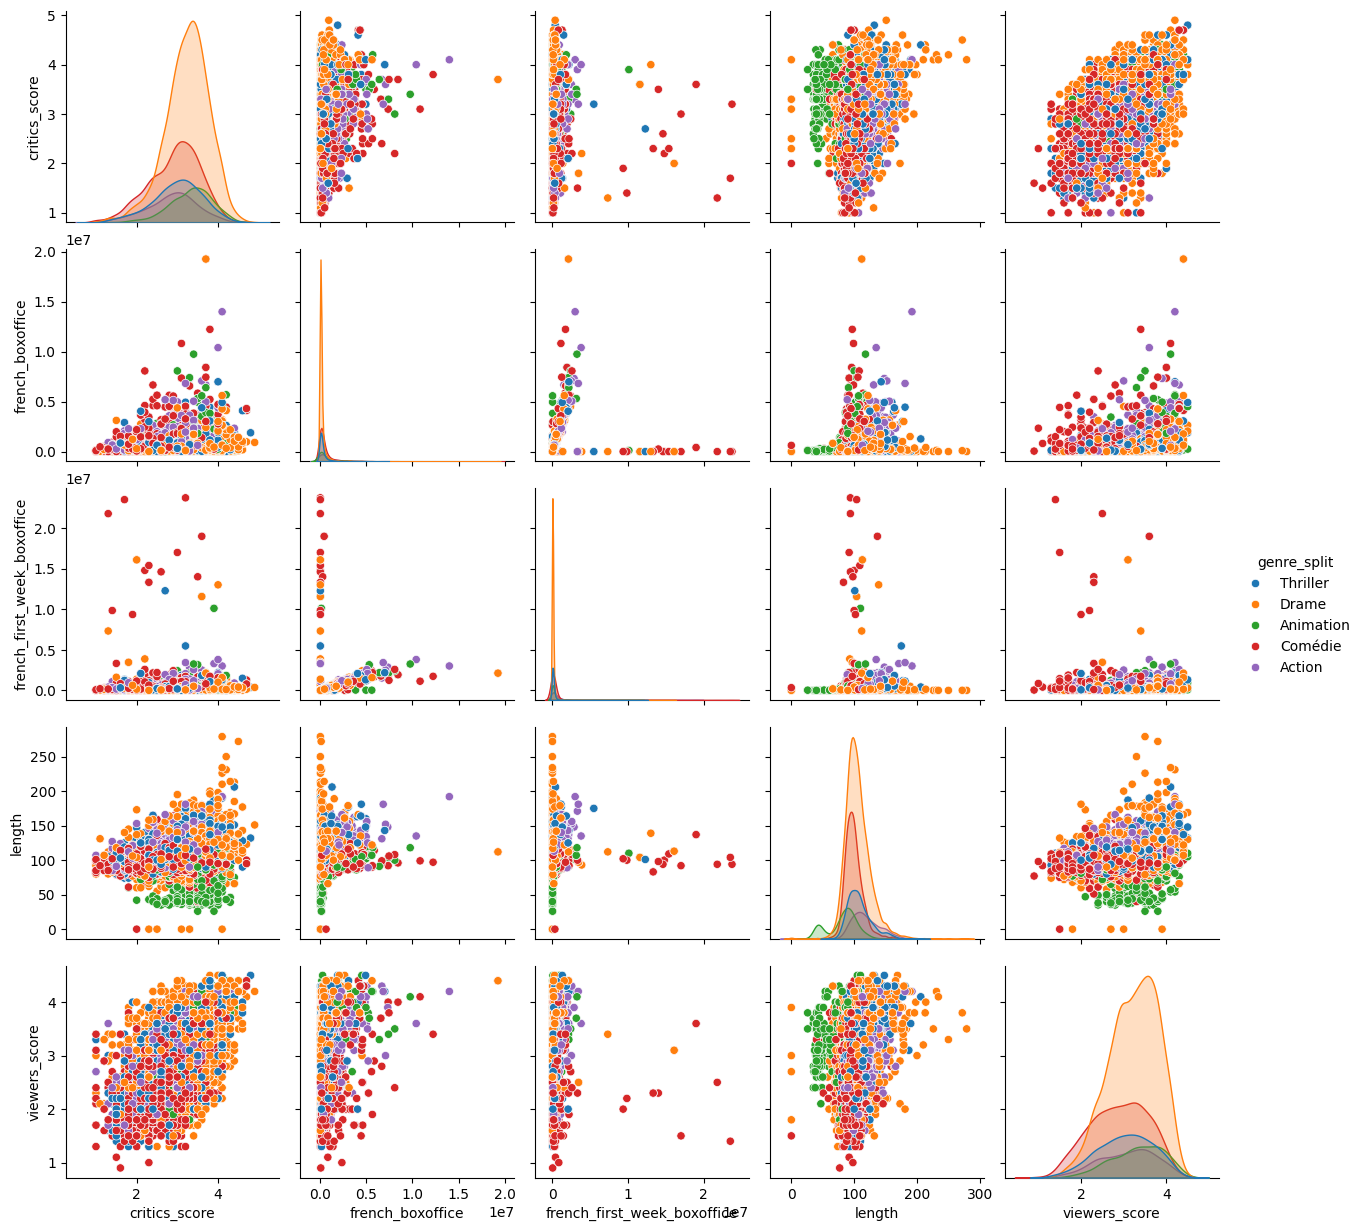

In [ ]:
# Explode the genre
df_genres = df.dropna(subset=['genre']).copy()
df_genres['genre_split'] = df_genres['genre'].str.split('|')
df_genres = df_genres.explode('genre_split').reset_index(drop=True)


top_genres = df_genres['genre_split'].value_counts().head(5).index
df_genres_top = df_genres[df_genres['genre_split'].isin(top_genres)]

sns.pairplot(df_genres_top, hue='genre_split', vars=continuous_columns)


In [ ]:

df_genres = df.dropna(subset=['genre']).copy()
df_genres['genre_split'] = df_genres['genre'].str.split('|')
df_genres = df_genres.explode('genre_split').reset_index(drop=True)

# average score by genre
genre_scores_mean = df_genres.groupby('genre_split')[['critics_score', 'viewers_score']].mean()


plt.figure(figsize=(8, 10))
sns.heatmap(genre_scores_mean.sort_values('critics_score', ascending=False), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average score by mean")
plt.ylabel('')
plt.show()


/home/utilisateur/Documents/cinema/new_is_always_better/modelisation/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


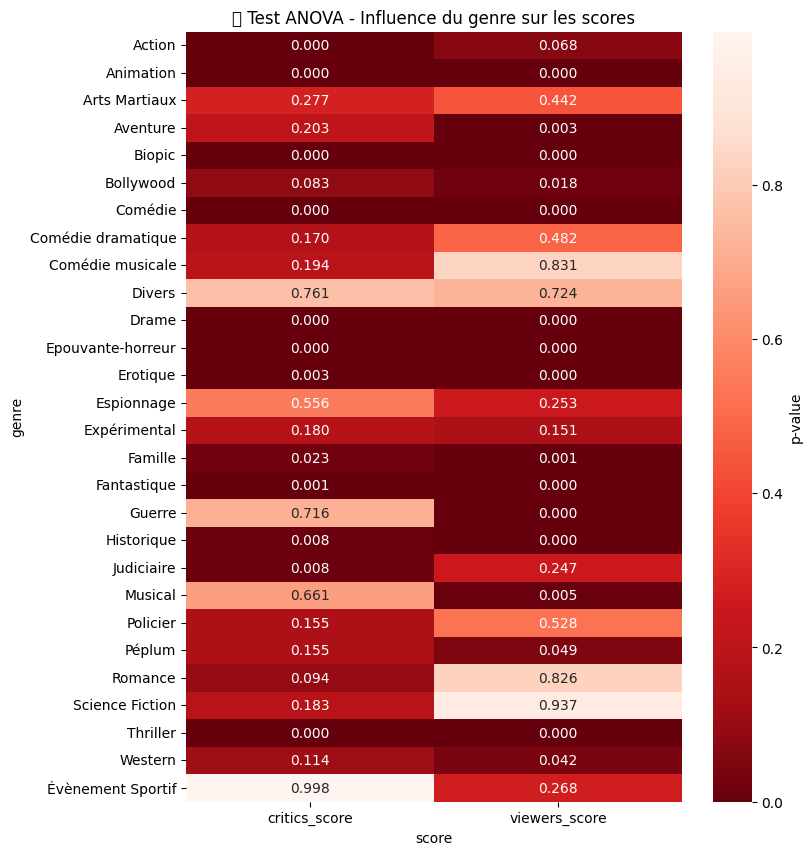

In [ ]:

# Pour chaque genre, on compare les scores des films avec et sans ce genre
anova_results = {}

for genre in df_genres['genre_split'].unique():
    group = df_genres['genre_split'] == genre
    others = df_genres['genre_split'] != genre
    
    for score_col in ['critics_score', 'viewers_score']:
        with_genre = df_genres.loc[group, score_col].dropna()
        without_genre = df_genres.loc[others, score_col].dropna()
        
        if len(with_genre) > 1 and len(without_genre) > 1:
            f, p = f_oneway(with_genre, without_genre)
            anova_results[(genre, score_col)] = p

# Transformer en DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df.index = pd.MultiIndex.from_tuples(anova_df.index, names=['genre', 'score'])
anova_pivot = anova_df.reset_index().pivot(index='genre', columns='score', values='p_value')

# Heatmap des p-values (plus c’est rouge, plus c’est significatif)
plt.figure(figsize=(8, 10))
sns.heatmap(anova_pivot, annot=True, fmt=".3f", cmap="Reds_r", cbar_kws={'label': 'p-value'})
plt.title("🔬 Test ANOVA - Influence du genre sur les scores")
plt.show()


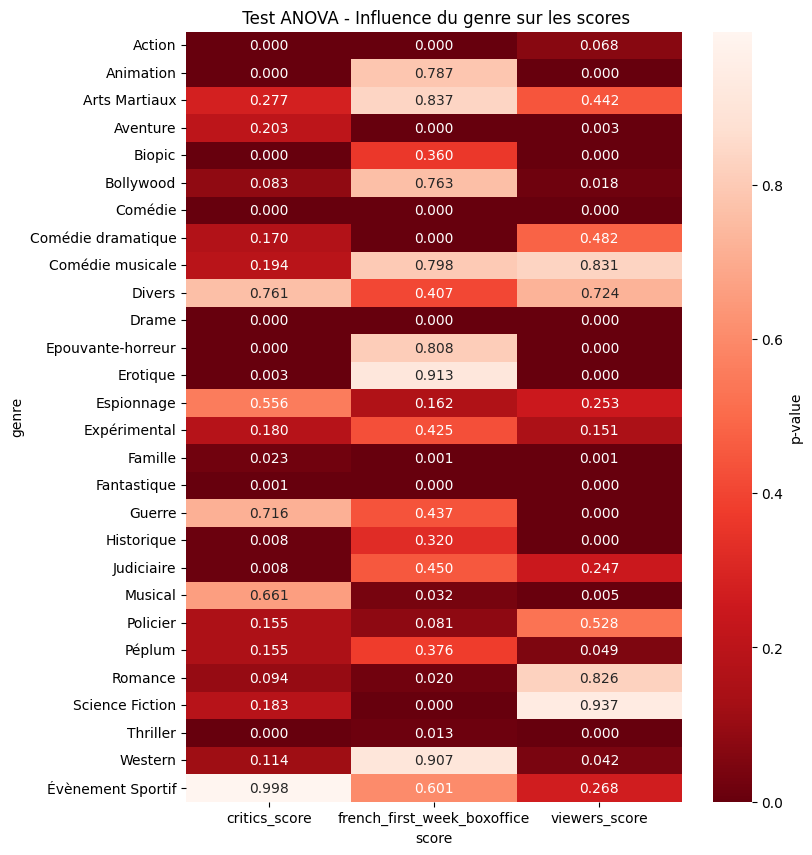

In [ ]:

# Pour chaque genre, on compare les scores des films avec et sans ce genre
anova_results = {}

for genre in df_genres['genre_split'].unique():
    group = df_genres['genre_split'] == genre
    others = df_genres['genre_split'] != genre
    
    for score_col in ['critics_score', 'viewers_score', 'french_first_week_boxoffice']:
        with_genre = df_genres.loc[group, score_col].dropna()
        without_genre = df_genres.loc[others, score_col].dropna()
        
        if len(with_genre) > 1 and len(without_genre) > 1:
            f, p = f_oneway(with_genre, without_genre)
            anova_results[(genre, score_col)] = p

# Transformer en DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
anova_df.index = pd.MultiIndex.from_tuples(anova_df.index, names=['genre', 'score'])
anova_pivot = anova_df.reset_index().pivot(index='genre', columns='score', values='p_value')

# Heatmap des p-values (plus c’est rouge, plus c’est significatif)
plt.figure(figsize=(8, 10))
sns.heatmap(anova_pivot, annot=True, fmt=".3f", cmap="Reds_r", cbar_kws={'label': 'p-value'})
plt.title(" Test ANOVA - Influence du genre sur les scores")
plt.show()


/tmp/ipykernel_48026/804263400.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_genres["french_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)
/tmp/ipykernel_48026/804263400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genres["french_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)


Text(0, 0.5, 'Genre')

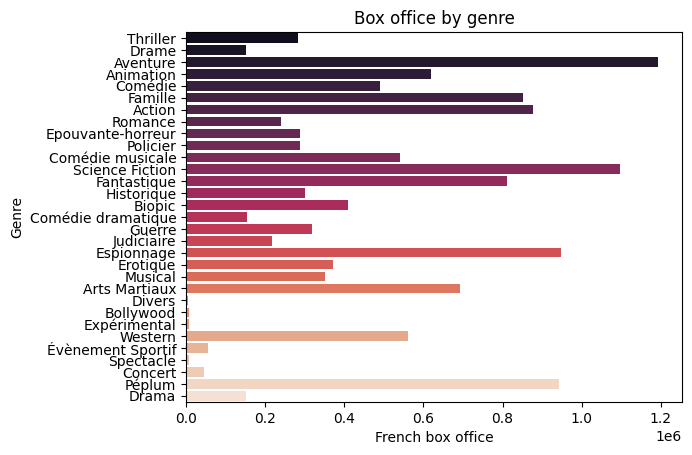

In [ ]:
plt.title("Box office by genre")
sns.barplot(x=df_genres["french_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)
plt.xlabel("French box office")
plt.ylabel("Genre")


/tmp/ipykernel_48026/1483305183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_genres["french_boxoffice"], y=df_genres["genre_split"], palette = "pastel")


Text(0, 0.5, 'Genre')

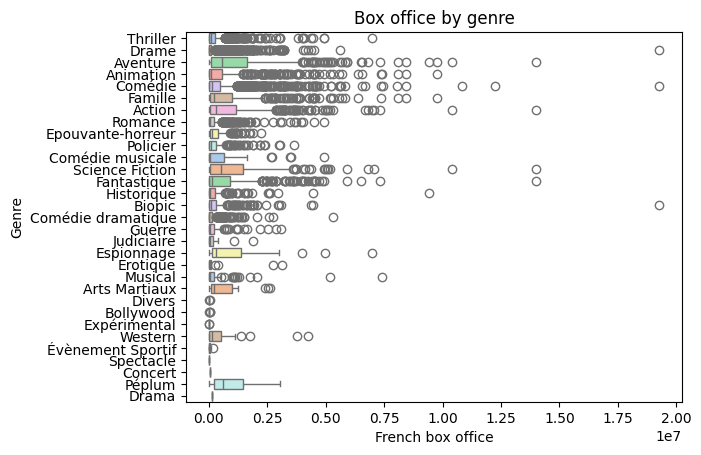

In [ ]:
plt.title("Box office by genre")
sns.boxplot(x=df_genres["french_boxoffice"], y=df_genres["genre_split"], palette = "pastel")
plt.xlabel("French box office")
plt.ylabel("Genre")


/tmp/ipykernel_48026/2846412405.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_genres["french_first_week_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)
/tmp/ipykernel_48026/2846412405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genres["french_first_week_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)


Text(0, 0.5, 'Genre')

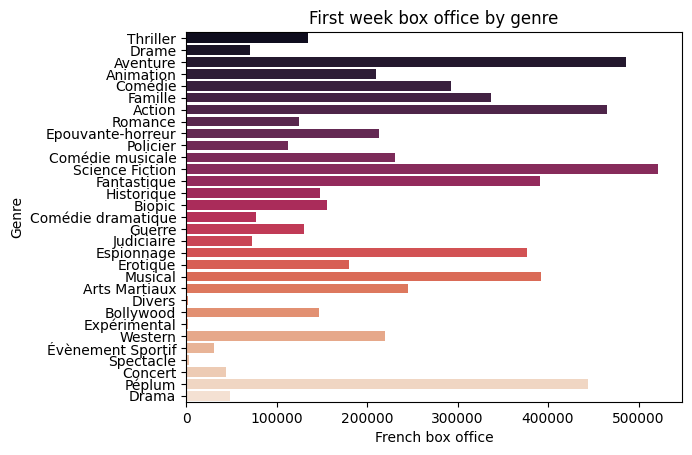

In [ ]:
plt.title("First week box office by genre")
sns.barplot(x=df_genres["french_first_week_boxoffice"], y=df_genres["genre_split"], palette = "rocket", ci=None)
plt.xlabel("French box office")
plt.ylabel("Genre")

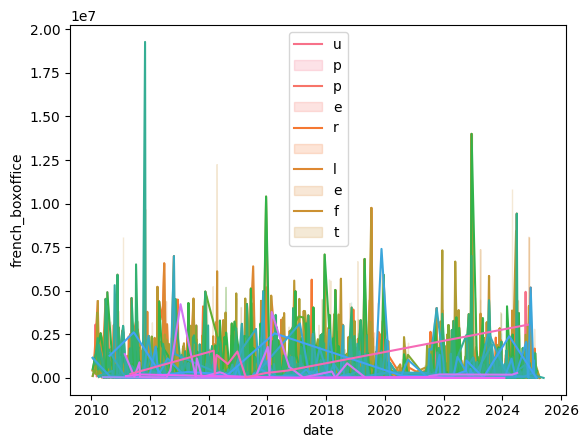

In [ ]:
sns.lineplot(x="date", y="french_boxoffice", hue="genre_split", data=df_genres)
plt.legend('upper left')

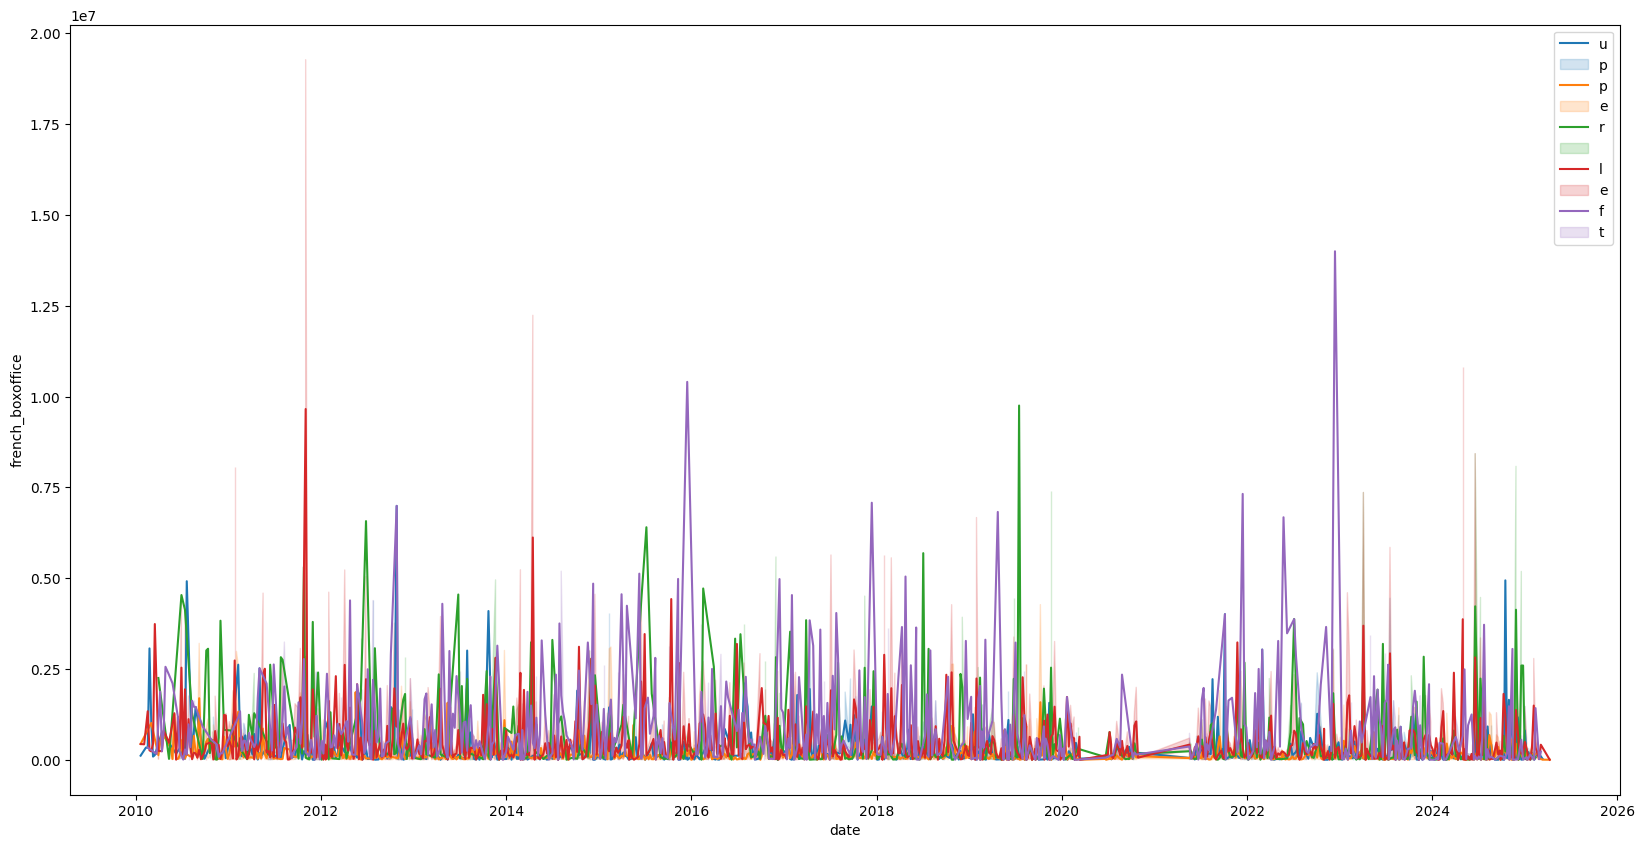

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="french_boxoffice", hue="genre_split", data=df_genres_top)
plt.legend('upper left')


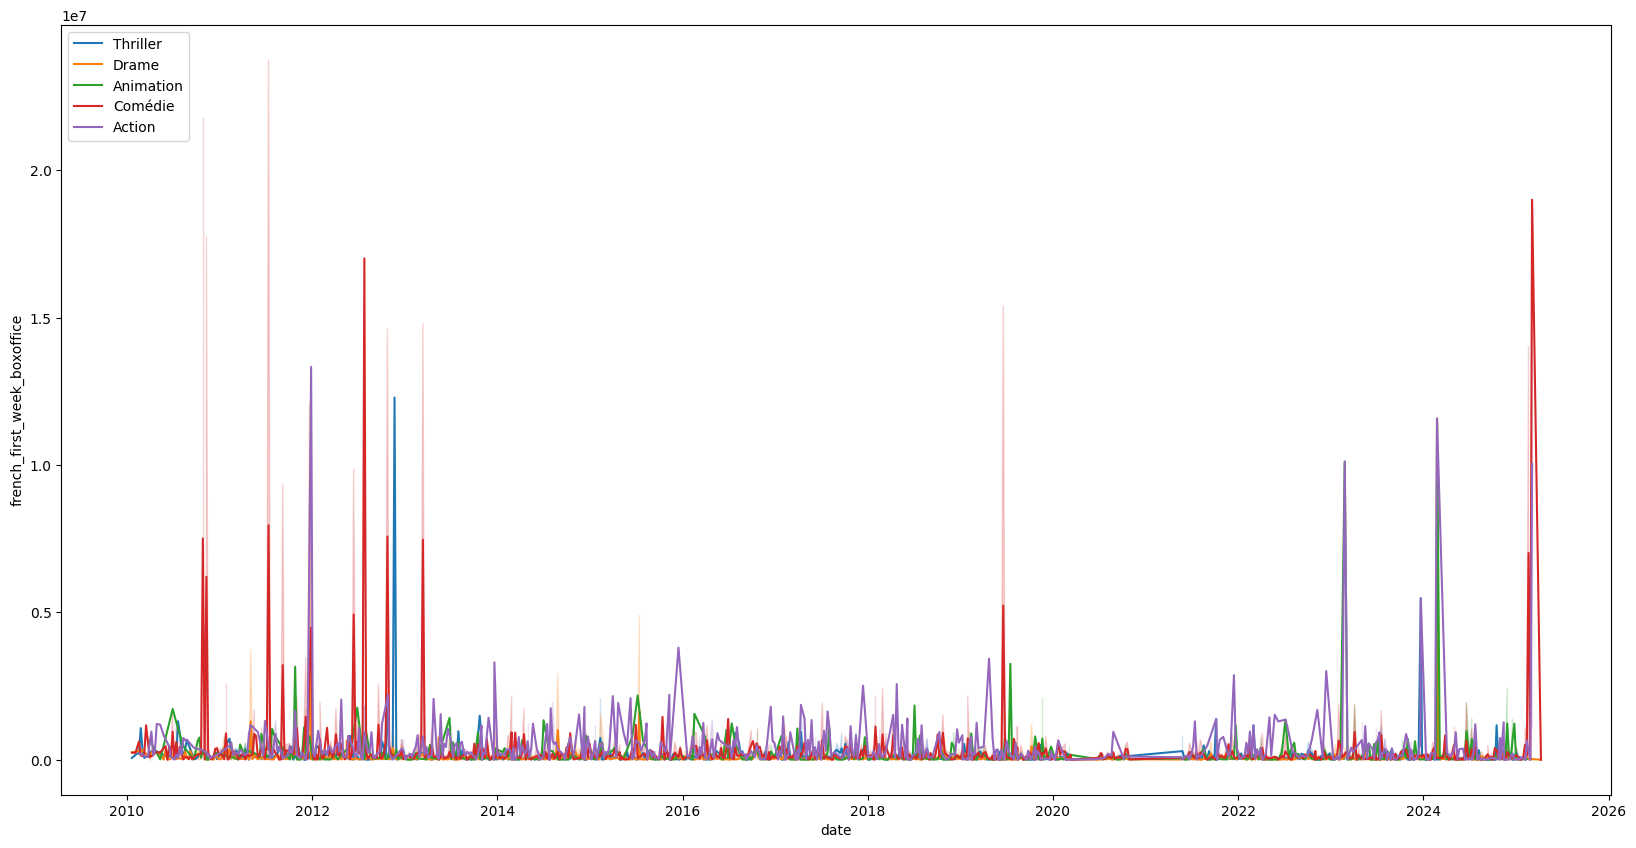

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="french_first_week_boxoffice", hue="genre_split", data=df_genres_top)
plt.legend(loc='upper left')

In [ ]:
# Addition of a year columns
df_genres['month']=df['date'].dt.month
df_genres_top['month']=df['date'].dt.month

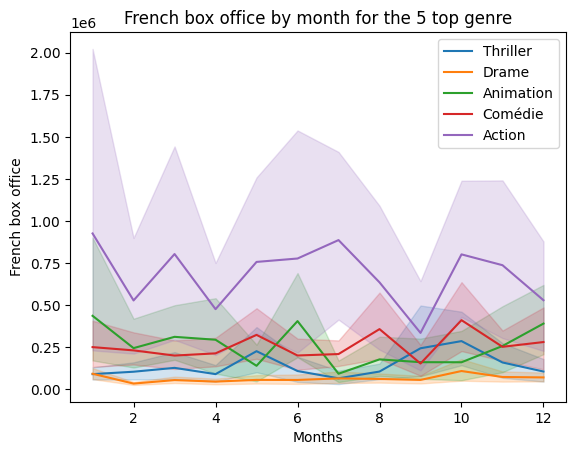

In [ ]:
plt.title("French box office by month for the 5 top genre")
plt.xlabel('Months')
plt.ylabel('French box office')
sns.lineplot(x="month", y="french_boxoffice", hue="genre_split", data=df_genres_top)
plt.legend(loc='upper right')


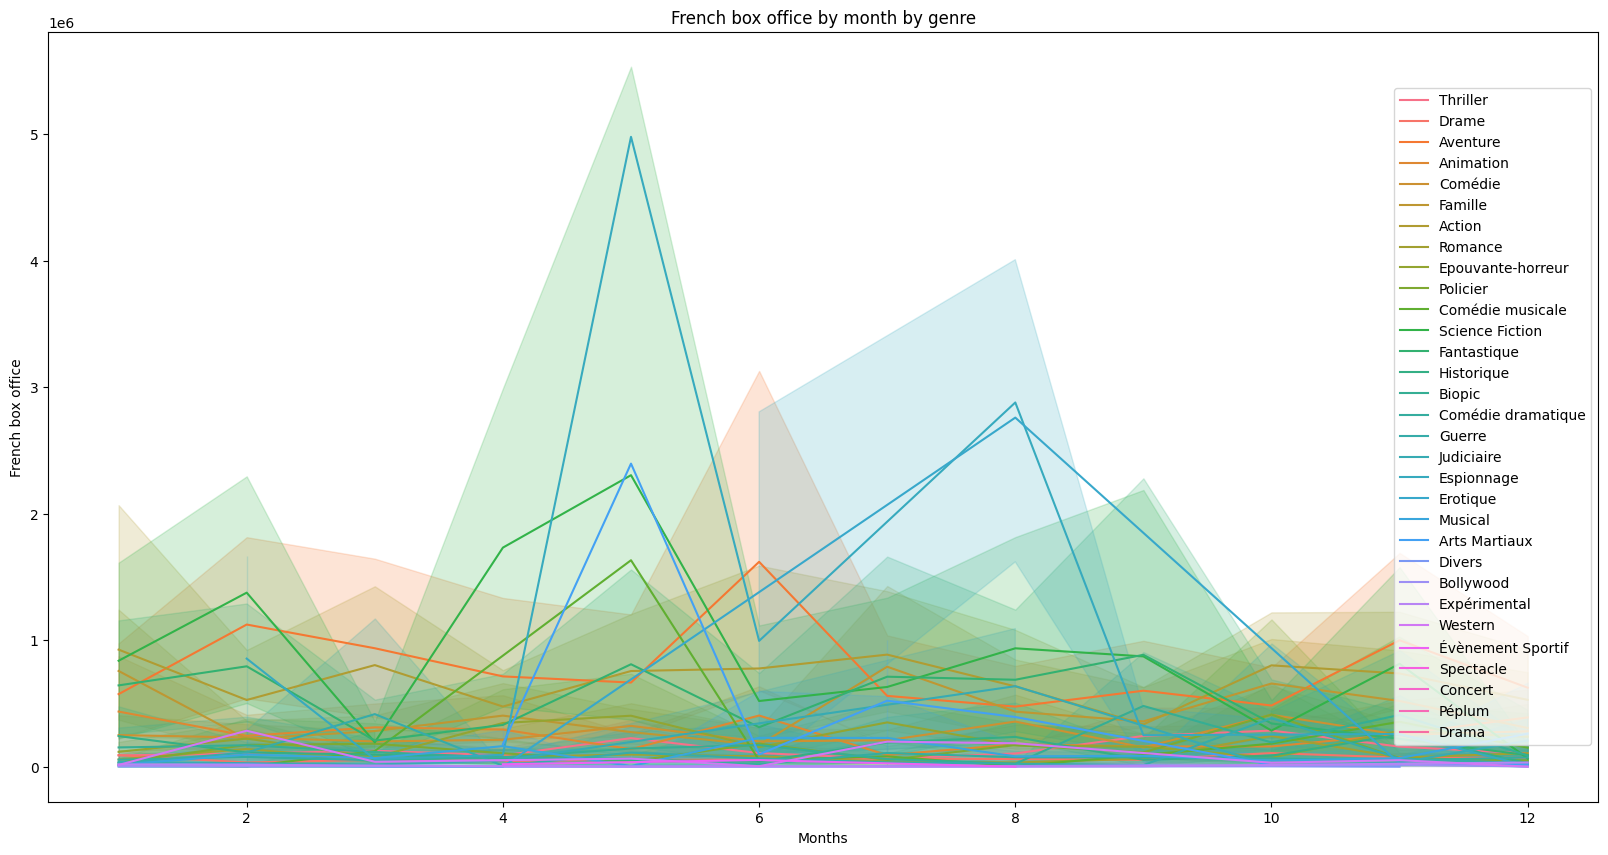

In [ ]:
plt.figure(figsize=(20,10))
plt.title("French box office by month by genre")
plt.xlabel('Months')
plt.ylabel('French box office')
sns.lineplot(x="month", y="french_boxoffice", hue="genre_split", data=df_genres)
plt.legend(loc='right')


### Actors

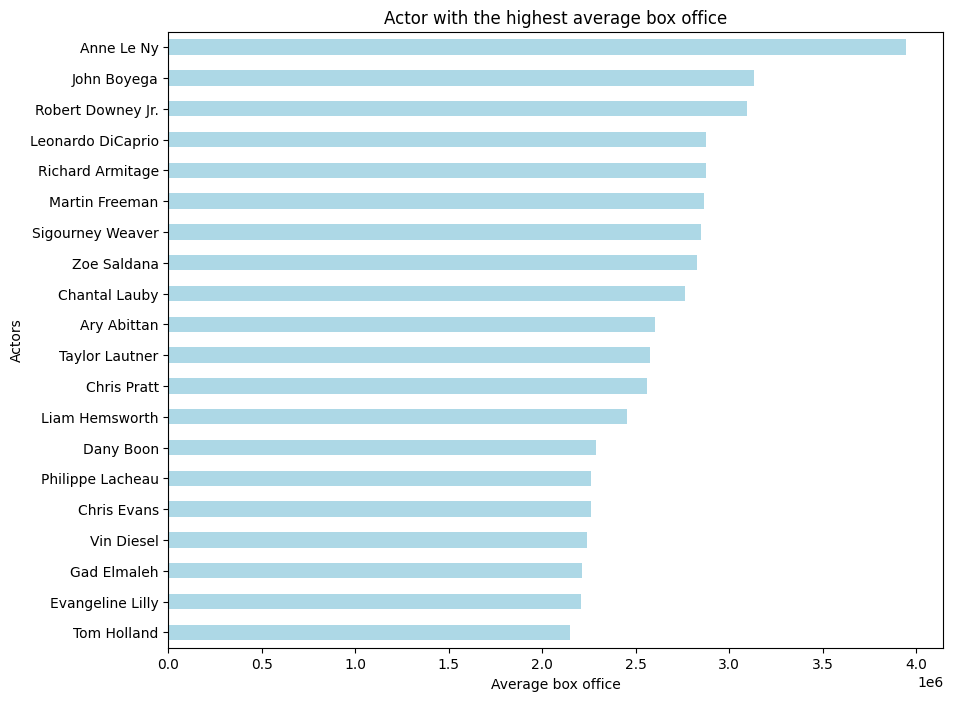

In [ ]:
# Explode the actors
df_actors = df.dropna(subset=['actors', 'french_boxoffice']).copy()
df_actors['actor_split'] = df_actors['actors'].str.split('|')
df_actors = df_actors.explode('actor_split').reset_index(drop=True)

# Average box office by actors
actor_boxoffice = (
    df_actors.groupby('actor_split')['french_boxoffice']
    .mean()
    .sort_values(ascending=False)
)

# Filter with minimum 5 movies 
actor_counts = df_actors['actor_split'].value_counts()
popular_actors = actor_counts[actor_counts >= 5].index
actor_boxoffice_filtered = actor_boxoffice[actor_boxoffice.index.isin(popular_actors)]

# Plot
actor_boxoffice_filtered.head(20).plot(kind='barh', figsize=(10, 8), color='lightblue')
plt.title("Top 20 actors with the highest average box office")
plt.xlabel("Average box office")
plt.ylabel("Actors")
plt.gca().invert_yaxis()
plt.show()


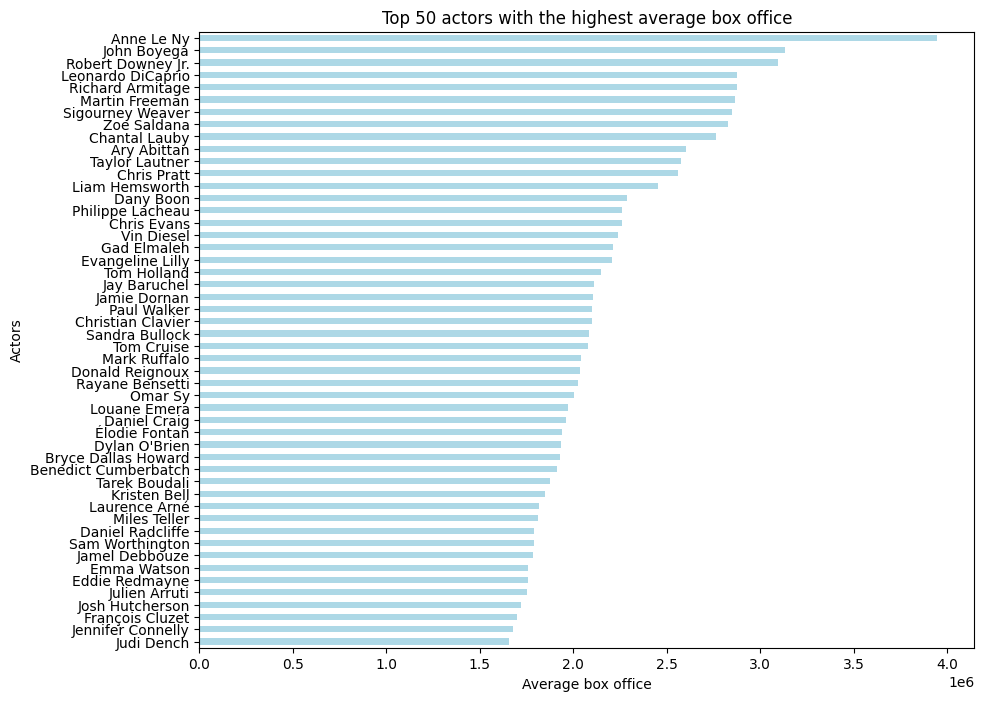

In [ ]:

df_actors = df.dropna(subset=['actors', 'french_boxoffice']).copy()
df_actors['actor_split'] = df_actors['actors'].str.split('|')
df_actors = df_actors.explode('actor_split').reset_index(drop=True)

actor_boxoffice = (
    df_actors.groupby('actor_split')['french_boxoffice']
    .mean()
    .sort_values(ascending=False)
)

actor_counts = df_actors['actor_split'].value_counts()
popular_actors = actor_counts[actor_counts >= 5].index
actor_boxoffice_filtered = actor_boxoffice[actor_boxoffice.index.isin(popular_actors)]

# Plot
plt.figure(figsize=(20,10))
actor_boxoffice_filtered.head(50).plot(kind='barh', figsize=(10, 8), color='lightblue')
plt.title("Top 50 actors with the highest average box office")
plt.xlabel("Average box office")
plt.ylabel("Actors")
plt.gca().invert_yaxis()
plt.show()


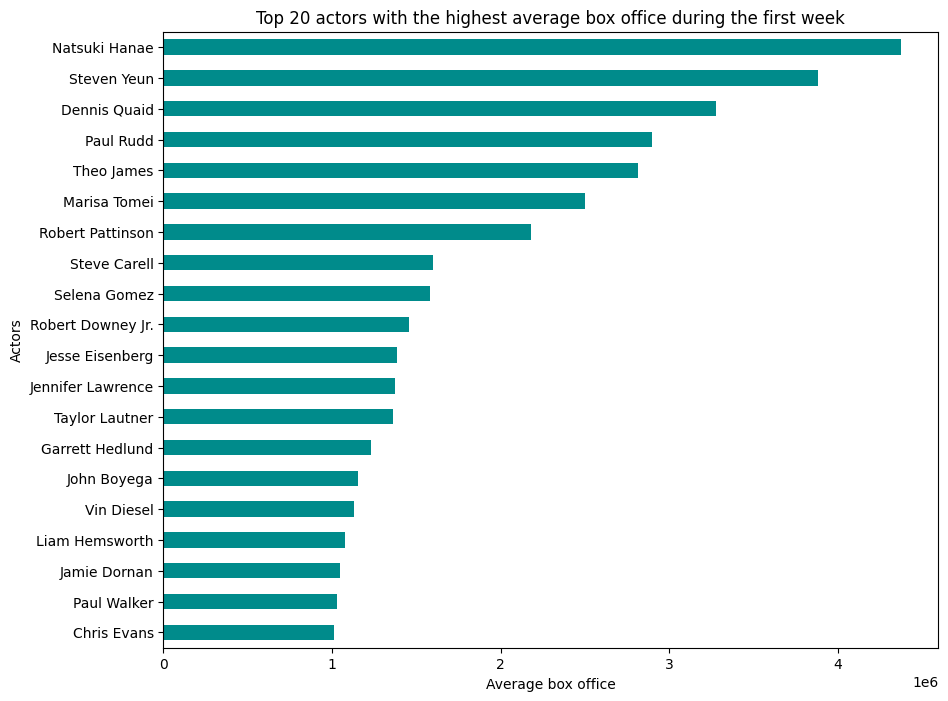

In [ ]:
# Explode the actors
df_actors = df.dropna(subset=['actors', 'french_boxoffice']).copy()
df_actors['actor_split'] = df_actors['actors'].str.split('|')
df_actors = df_actors.explode('actor_split').reset_index(drop=True)

# Average box office by actors
actor_boxoffice = (
    df_actors.groupby('actor_split')['french_first_week_boxoffice']
    .mean()
    .sort_values(ascending=False)
)

# Filter with minimum 5 movies 
actor_counts = df_actors['actor_split'].value_counts()
popular_actors = actor_counts[actor_counts >= 5].index
actor_boxoffice_filtered = actor_boxoffice[actor_boxoffice.index.isin(popular_actors)]

# Plot
actor_boxoffice_filtered.head(20).plot(kind='barh', figsize=(10, 8), color='darkcyan')
plt.title("Top 20 actors with the highest average box office during the first week")
plt.xlabel("Average box office")
plt.ylabel("Actors")
plt.gca().invert_yaxis()
plt.show()


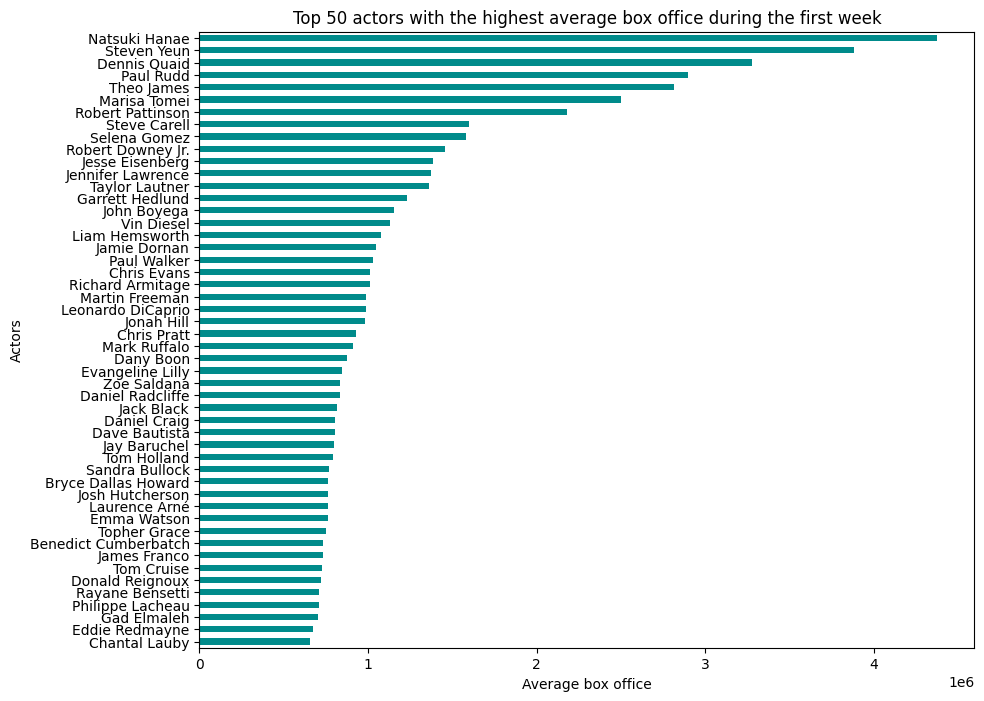

In [ ]:
# Explode the actors
df_actors = df.dropna(subset=['actors', 'french_boxoffice']).copy()
df_actors['actor_split'] = df_actors['actors'].str.split('|')
df_actors = df_actors.explode('actor_split').reset_index(drop=True)

# Average box office by actors
actor_boxoffice = (
    df_actors.groupby('actor_split')['french_first_week_boxoffice']
    .mean()
    .sort_values(ascending=False)
)

# Filter with minimum 5 movies 
actor_counts = df_actors['actor_split'].value_counts()
popular_actors = actor_counts[actor_counts >= 5].index
actor_boxoffice_filtered = actor_boxoffice[actor_boxoffice.index.isin(popular_actors)]

# Plot
actor_boxoffice_filtered.head(50).plot(kind='barh', figsize=(10, 8), color='darkcyan')
plt.title("Top 50 actors with the highest average box office during the first week")
plt.xlabel("Average box office")
plt.ylabel("Actors")
plt.gca().invert_yaxis()
plt.show()


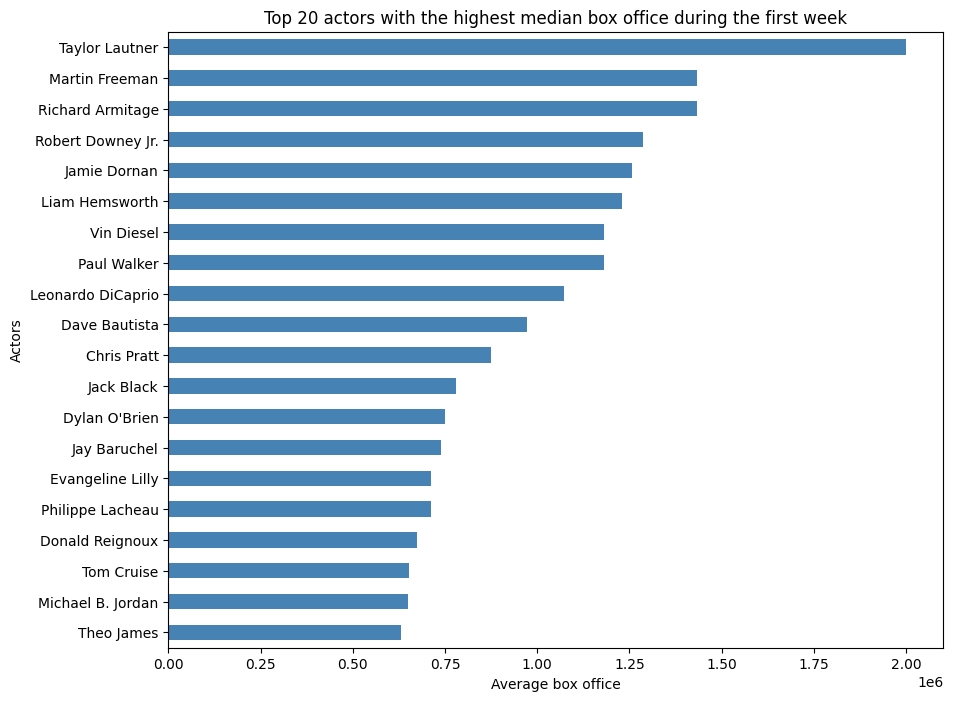

In [ ]:
# Explode the actors
df_actors = df.dropna(subset=['actors', 'french_first_week_boxoffice']).copy()
df_actors['actor_split'] = df_actors['actors'].str.split('|')
df_actors = df_actors.explode('actor_split').reset_index(drop=True)

# Average box office by actors
actor_boxoffice = (
    df_actors.groupby('actor_split')['french_first_week_boxoffice']
    .median()
    .sort_values(ascending=False)
)

# Filter with minimum 5 movies 
actor_counts = df_actors['actor_split'].value_counts()
popular_actors = actor_counts[actor_counts >= 5].index
actor_boxoffice_filtered = actor_boxoffice[actor_boxoffice.index.isin(popular_actors)]

# Plot
actor_boxoffice_filtered.head(20).plot(kind='barh', figsize=(10, 8), color='steelblue')
plt.title("Top 20 actors with the highest median box office during the first week")
plt.xlabel("Median box office")
plt.ylabel("Actors")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
actor_boxoffice

actor_split
Devon Bostick        23751502.0
Stephanie Szostak    23527839.0
Rachael Harris       22775751.0
Zachary Gordon       20058367.0
Sean Hayes           17010125.0
                        ...    
Maxime Kathari              5.0
Alice Matthey               5.0
Ban Taito                   NaN
Genta Nakamura              NaN
Pamela Anderson             NaN
Name: french_first_week_boxoffice, Length: 11128, dtype: float64

In [ ]:

# Étape 1 : exploser les acteurs
df_actors = df.dropna(subset=['actors']).copy()
df_actors['actors_list'] = df_actors['actors'].str.split('|')

# Étape 2 : générer tous les couples d'acteurs pour chaque film
actor_pairs = []

for actors in df_actors['actors_list']:
    actors = sorted(set(actors))  # enlever doublons éventuels
    if len(actors) > 1:
        actor_pairs.extend(combinations(actors, 2))

# Étape 3 : compter les co-occurrences
pair_counts = Counter(actor_pairs)

# Filtrage : ne garder que les duos avec au moins 3 films ensemble
filtered_pairs = {pair: count for pair, count in pair_counts.items() if count >= 3}


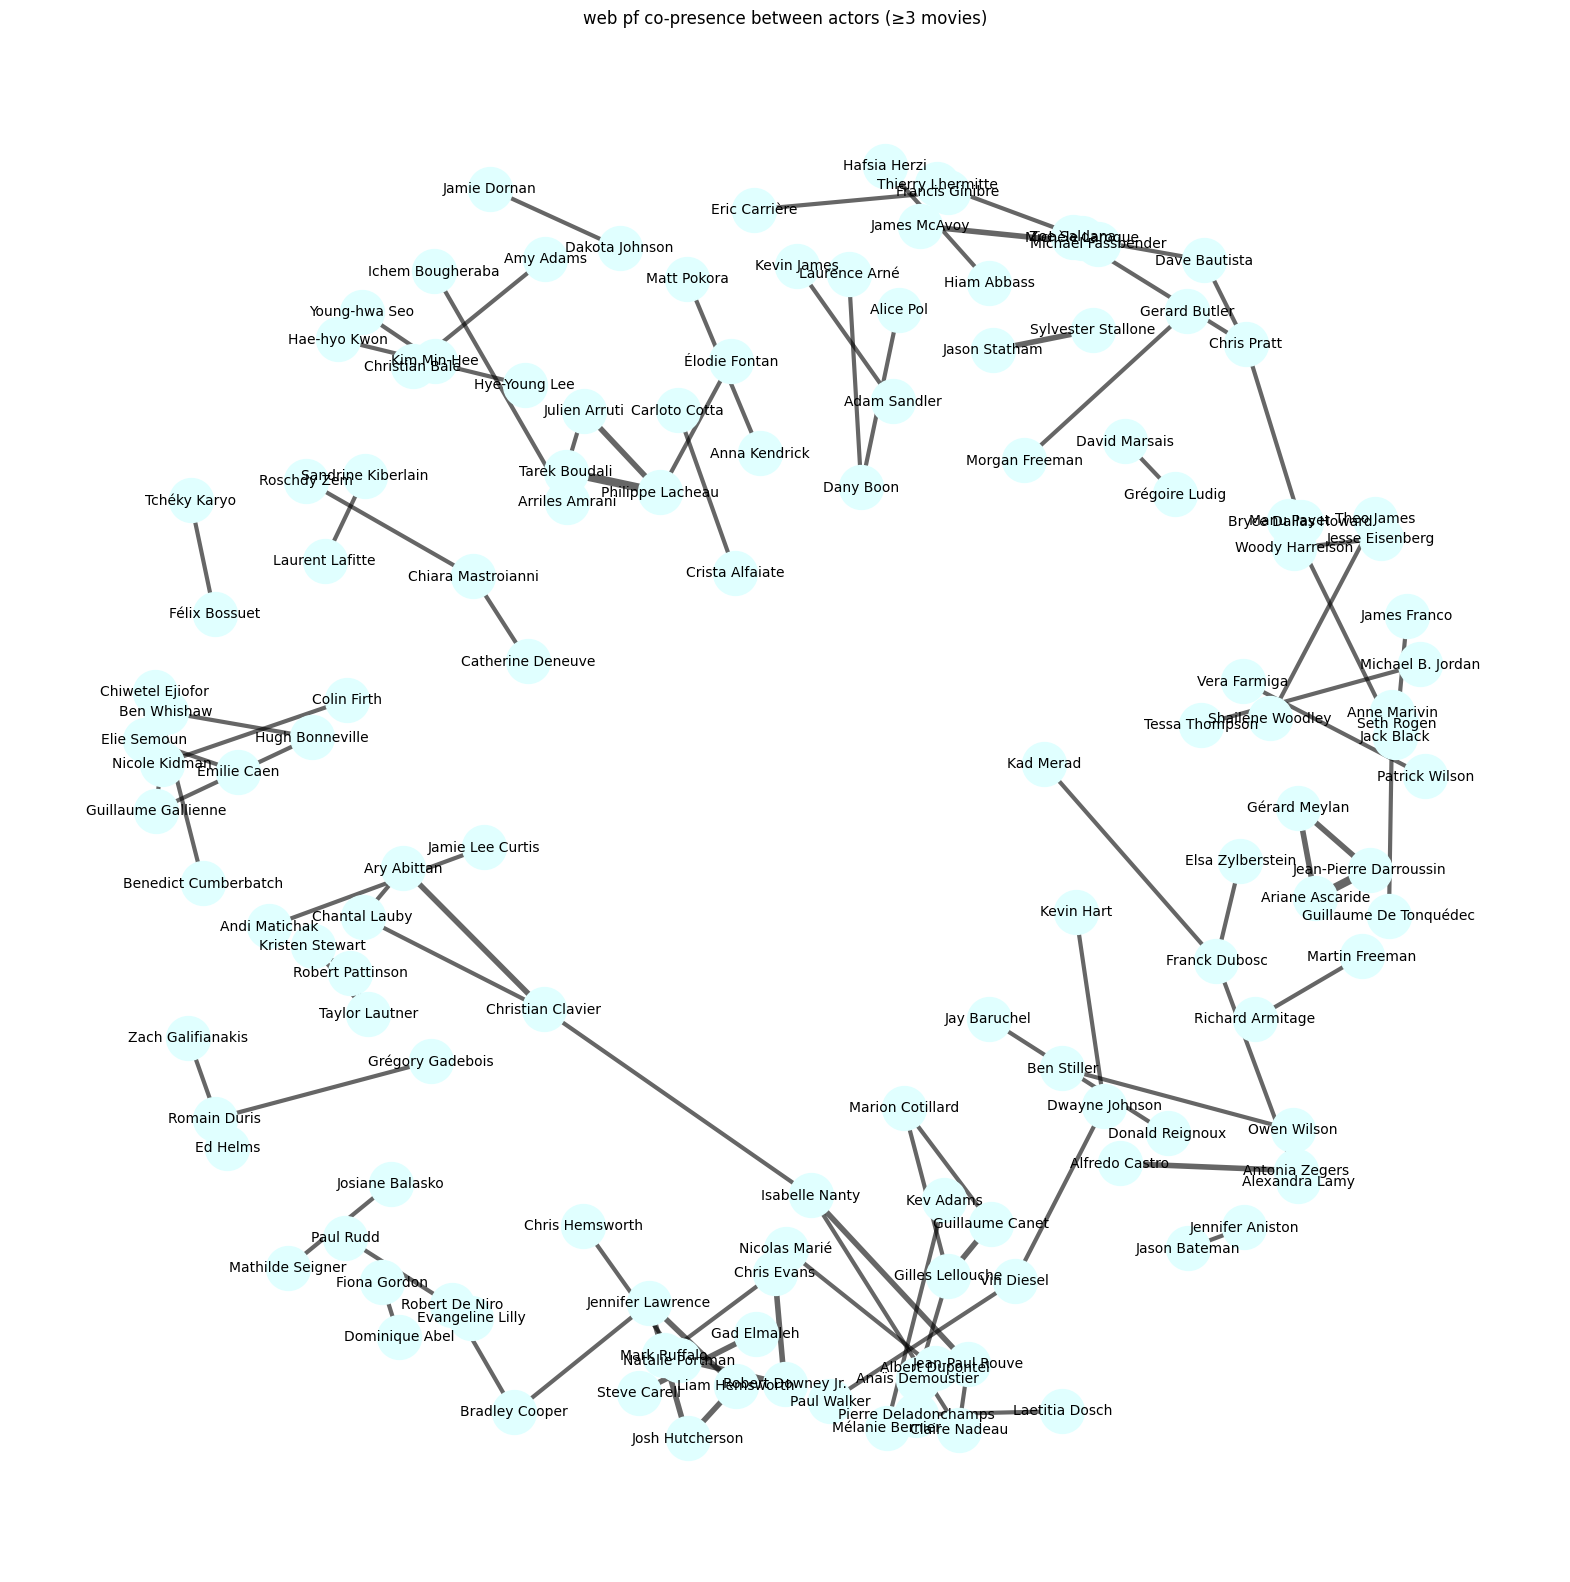

In [ ]:
# Create graph
G = nx.Graph()

# Add ponderate edges
for (actor1, actor2), weight in filtered_pairs.items():
    G.add_edge(actor1, actor2, weight=weight)

# Layout 

pos = nx.spring_layout(G, k=0.5, seed=42)
plt.figure(figsize=(20, 20))
# Nodes
nx.draw_networkx_nodes(G, pos, node_color="lightcyan", node_size=1000)

# Edges ponderate
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in edges],
                       width=[d['weight'] for u, v, d in edges], alpha=0.6)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("web pf co-presence between actors (≥3 movies)")
plt.axis("off")
plt.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

# Générer les positions des nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)

# Créer les arêtes pour Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Créer les nœuds
node_x = []
node_y = []
node_text = []
node_size = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_size.append(G.degree(node) * 5)  # Taille = nombre de connexions

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    textposition='top center',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_size,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Nombre de connexions',
            xanchor='left',
            # titleside est supprimé ici ✅
        ),
        line_width=2)
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(
                        text='Réseau interactif des acteurs',
                        font=dict(size=20)
                    ),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))
fig.write_html("reseau_acteurs.html")
import webbrowser
webbrowser.open("reseau_acteurs.html")


True

In [ ]:

# Générer les positions des nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)

# Créer les arêtes pour Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Créer les nœuds
node_x = []
node_y = []
node_text = []
node_size = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    
    # Utiliser actor_boxoffice pour la taille et la couleur des nœuds
    size = actor_boxoffice.get(node, 0) / 10000  # Ajuste la taille en fonction du box office
    node_size.append(size if size > 10 else 10)  # Empêche que la taille soit trop petite
    node_color.append(actor_boxoffice.get(node, 0))  # Colorie les nœuds selon le box office

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    textposition='top center',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Box Office',
            xanchor='left',
        ),
        line_width=2)
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(
                        text='Réseau interactif des acteurs avec Box Office',
                        font=dict(size=20)
                    ),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

fig.write_html("reseau_acteurs_boxoffice_interactif.html")
import webbrowser
webbrowser.open("reseau_acteurs_boxoffice_interactif.html")

True